In [103]:
import os

os.getcwd()
os.chdir("/Users/deekshithsathrasalagangadharaiah/BF-Open-Data/Datasets")
os.getcwd()


'/Users/deekshithsathrasalagangadharaiah/BF-Open-Data/Datasets'

In [104]:
import pandas as pd
import os

# Base path
base_path = '/Users/deekshithsathrasalagangadharaiah/BF-Open-Data/Datasets'
years = ['2020', '2021', '2022', '2023', '2024', '2025']

# =========================
# PART 1: Mission Data
# =========================
mission_list = []

for year in years:
    file_name = f"mission_data_set_open_data_{year}.csv"
    file_path = os.path.join(base_path, 'Mission_Data', file_name)

    if os.path.exists(file_path):
        print(f"Reading: {file_name}")

        # low_memory=False prevents DtypeWarning
        df = pd.read_csv(file_path, low_memory=False)

        # Clean column names
        df.columns = df.columns.str.strip()

        # Standardize date column name
        if 'mission_date' in df.columns:
            df = df.rename(columns={'mission_date': 'mission_created_date'})

        mission_list.append(df)

# Merge all mission data
df_mission_all = pd.concat(mission_list, ignore_index=True)

# Convert date safely
df_mission_all['mission_created_date'] = pd.to_datetime(
    df_mission_all['mission_created_date'],
    errors='coerce'
)

# =========================
# PART 2: Regional Data
# =========================
regional_list = []

for year in years:
    folder_path = os.path.join(base_path, 'Regional_Data', year)

    if os.path.exists(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith('.csv'):
                rdf = pd.read_csv(
                    os.path.join(folder_path, file),
                    low_memory=False  # prevents warnings
                )

                rdf.columns = rdf.columns.str.strip()
                rdf['source_year'] = int(year)

                regional_list.append(rdf)

# Merge all regional data
df_regional_all = pd.concat(regional_list, ignore_index=True)

# =========================
# PART 3: Export
# =========================
df_mission_all.to_csv('Berlin_Missions_2020_2025.csv', index=False)
df_regional_all.to_csv('Berlin_Regional_2020_2025.csv', index=False)

print("\n--- DONE SUCCESSFULLY ---")
print(f"Total mission records: {len(df_mission_all)}")
print(f"Total regional records: {len(df_regional_all)}")
print("No pandas warnings. Files ready for analysis & Tableau.")


Reading: mission_data_set_open_data_2020.csv
Reading: mission_data_set_open_data_2021.csv
Reading: mission_data_set_open_data_2022.csv
Reading: mission_data_set_open_data_2023.csv
Reading: mission_data_set_open_data_2024.csv
Reading: mission_data_set_open_data_2025.csv

--- DONE SUCCESSFULLY ---
Total mission records: 2977970
Total regional records: 4458
No pandas warnings. Files ready for analysis & Tableau.


In [105]:
pwd

'/Users/deekshithsathrasalagangadharaiah/BF-Open-Data/Datasets'

In [106]:
ls -ltrh

total 1320528
drwxr-xr-x   4 deekshithsathrasalagangadharaiah  staff   128B Oct 23 19:44 Dispatchcodes/
drwxr-xr-x   4 deekshithsathrasalagangadharaiah  staff   128B Oct 23 19:44 KV_Data/
drwxr-xr-x  10 deekshithsathrasalagangadharaiah  staff   320B Oct 23 19:44 Mission_Data/
drwxr-xr-x  10 deekshithsathrasalagangadharaiah  staff   320B Oct 23 19:44 Regional_Data/
drwxr-xr-x  36 deekshithsathrasalagangadharaiah  staff   1.1K Oct 23 19:44 Turnout_Times/
drwxr-xr-x  13 deekshithsathrasalagangadharaiah  staff   416B Nov  2 16:10 Daily_Data/
-rw-r--r--   1 deekshithsathrasalagangadharaiah  staff   294M Dec 23 17:59 berlin_fire_missions_2020_2024_district_level.csv
-rw-r--r--   1 deekshithsathrasalagangadharaiah  staff   2.8K Dec 23 17:59 berlin_fire_missions_2020_2024_district_kpis.csv
-rw-r--r--   1 deekshithsathrasalagangadharaiah  staff   623K Dec 28 13:12 berlin_q3_q4_fixed.png
-rw-r--r--   1 deekshithsathrasalagangadharaiah  staff   406K Dec 28 13:13 berlin_delay_predictor_rf.png
-rw-

In [62]:
import pandas as pd

regional_path = "  Berlin_Regional_2020_2025.csv"

df_Berlin_Regional_2020_2025 = pd.read_csv(regional_path)
df_Berlin_Regional_2020_2025

,district_area_id,district_area_name,mission_count_all,mission_count_ems,mission_count_ems_critical,mission_count_ems_critical_cpr,mission_count_fire,mission_count_technical_rescue,mission_count_ems_critical_timegoal_computed,mission_count_fire_timegoal_computed,...,response_time_fire_time_to_full_crew_median,response_time_fire_time_to_full_crew_std,response_time_technical_rescue_mean,response_time_technical_rescue_median,response_time_technical_rescue_std,source_year,planning_room_id,planning_room_name,prediction_area_id,prediction_area_name
0,11001.0,Tiergarten Süd,3160,2388,2071,39,253,150,1847,143,...,780.48,169.49,823.14,744.5,301.66,2020,NaN,NaN,NaN,NaN
1,11002.0,Regierungsviertel,3587,3090,2665,41,302,161,2415,161,...,775.90,1508.51,870.36,806.0,326.23,2020,NaN,NaN,NaN,NaN
2,11003.0,Alexanderplatz,11231,9298,8048,145,635,351,7220,295,...,723.74,163.23,923.35,862.5,418.63,2020,NaN,NaN,NaN,NaN
3,11004.0,Brunnenstraße Süd,2342,2089,1762,34,108,110,1591,44,...,738.25,242.23,943.73,831.0,440.28,2020,NaN,NaN,NaN,NaN
4,12005.0,Moabit West,5188,4705,3829,78,220,206,3458,66,...,695.21,561.71,737.84,646.0,325.49,2020,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453,NaN,NaN,7030,6537,4595,68,268,218,4091,79,...,733.86,436.79,831.90,758.5,318.33,2025,NaN,NaN,1210.0,Reinickendorf Ost
4454,NaN,NaN,8304,7745,5255,68,258,294,4682,94,...,778.26,127.27,877.25,854.0,356.34,2025,NaN,NaN,1220.0,Tegel
4455,NaN,NaN,5622,4593,3138,60,122,738,2674,13,...,920.87,164.83,983.38,963.5,424.77,2025,NaN,NaN,1240.0,Grüner Norden
4456,NaN,NaN,6339,5606,3891,51,173,308,3485,45,...,784.16,124.21,857.28,788.5,348.25,2025,NaN,NaN,1250.0,Wittenau/Borsigwalde


CLEANING


In [107]:
drop_cols = ["Unnamed: 0"]

In [108]:
# Start from here Inspect first chunk ONLY
import pandas as pd

mission_path = "/Users/deekshithsathrasalagangadharaiah/BF-Open-Data/Datasets/Berlin_Missions_2020_2025.csv"

chunks = pd.read_csv(
    mission_path,
    chunksize=200_000,
    dtype=str,
    low_memory=False
)

first_chunk = next(chunks)

print("COLUMNS SEEN BY PANDAS:")
print(first_chunk.columns.tolist())

print("\nFIRST 5 ROWS:")
print(first_chunk.head())



COLUMNS SEEN BY PANDAS:
['Unnamed: 0', 'mission_created_date', 'mission_type', 'dispatchcode_category', 'dispatchcode_criticality', 'mission_location_district', 'response_time', 'units_non_berlin_involed', 'units_several_involved', 'units_reinforcements_called', 'units_organisations', 'firstresponder_alarmed', 'firstresponder_indication', 'firstresponder_first_arrival', 'units_first_type', 'emergency_doctor_involved']

FIRST 5 ROWS:
  Unnamed: 0 mission_created_date    mission_type dispatchcode_category  \
0          0           2020-01-07  Rettungsdienst                   NaN   
1          1           2020-01-01           Brand                   NaN   
2          2           2020-01-03  Rettungsdienst                   NaN   
3          3           2020-01-05  Rettungsdienst                   NaN   
4          4           2020-01-02           Brand                   NaN   

  dispatchcode_criticality mission_location_district response_time  \
0                      NaN          Trepto

In [109]:
import pandas as pd

mission_path = "/Users/deekshithsathrasalagangadharaiah/BF-Open-Data/Datasets/Berlin_Missions_2020_2025.csv"

chunks = pd.read_csv(
    mission_path,
    chunksize=200_000,
    dtype=str,
    low_memory=False
)



In [110]:
cleaned_chunks = []

for chunk in chunks:
    # Drop useless index column
    chunk = chunk.drop(columns=["Unnamed: 0"], errors="ignore")

    # Rename for consistency (optional but recommended)
    chunk = chunk.rename(
        columns={"mission_created_date": "mission_date"}
    )

    # Parse date
    chunk["mission_date"] = pd.to_datetime(
        chunk["mission_date"], errors="coerce"
    )

    # Derive Year (IMPORTANT)
    chunk["Year"] = chunk["mission_date"].dt.year

    # Normalize district names
    chunk["mission_location_district"] = (
        chunk["mission_location_district"]
        .str.strip()
        .str.upper()
    )

    # Convert response time
    chunk["response_time"] = pd.to_numeric(
        chunk["response_time"], errors="coerce"
    )

    # Filter invalid rows
    chunk = chunk.dropna(
        subset=["mission_date", "Year", "response_time"]
    )

    chunk = chunk[
        (chunk["response_time"] > 0) &
        (chunk["response_time"] < 3600)
    ]

    cleaned_chunks.append(
        chunk[
            [
                "mission_date",
                "Year",
                "mission_type",
                "dispatchcode_category",
                "dispatchcode_criticality",
                "mission_location_district",
                "response_time",
                "units_organisations",
                "emergency_doctor_involved"
            ]
        ]
    )

mission_clean = pd.concat(cleaned_chunks, ignore_index=True)


In [111]:
mission_clean.head()
mission_clean.columns
mission_clean["Year"].value_counts().sort_index()


Year
2020    412480
2021    432513
2022    451010
2023    448550
2024    472290
2025    397665
Name: count, dtype: int64

In [112]:
import pandas as pd

mission_df = pd.read_csv(
    "/Users/deekshithsathrasalagangadharaiah/BF-Open-Data/Datasets/Berlin_Missions_2020_2025.csv",
    low_memory=False
)

mission_df.shape



(2977970, 16)

In [113]:
regional_df = pd.read_csv(
    "/Users/deekshithsathrasalagangadharaiah/BF-Open-Data/Datasets/Berlin_Regional_2020_2025.csv",
    low_memory=False
)

regional_df.shape


(4458, 35)

In [114]:
regional_df.head()



,district_area_id,district_area_name,mission_count_all,mission_count_ems,mission_count_ems_critical,mission_count_ems_critical_cpr,mission_count_fire,mission_count_technical_rescue,mission_count_ems_critical_timegoal_computed,mission_count_fire_timegoal_computed,...,response_time_fire_time_to_full_crew_median,response_time_fire_time_to_full_crew_std,response_time_technical_rescue_mean,response_time_technical_rescue_median,response_time_technical_rescue_std,source_year,planning_room_id,planning_room_name,prediction_area_id,prediction_area_name
0,11001.0,Tiergarten Süd,3160,2388,2071,39,253,150,1847,143,...,780.48,169.49,823.14,744.5,301.66,2020,NaN,NaN,NaN,NaN
1,11002.0,Regierungsviertel,3587,3090,2665,41,302,161,2415,161,...,775.90,1508.51,870.36,806.0,326.23,2020,NaN,NaN,NaN,NaN
2,11003.0,Alexanderplatz,11231,9298,8048,145,635,351,7220,295,...,723.74,163.23,923.35,862.5,418.63,2020,NaN,NaN,NaN,NaN
3,11004.0,Brunnenstraße Süd,2342,2089,1762,34,108,110,1591,44,...,738.25,242.23,943.73,831.0,440.28,2020,NaN,NaN,NaN,NaN
4,12005.0,Moabit West,5188,4705,3829,78,220,206,3458,66,...,695.21,561.71,737.84,646.0,325.49,2020,NaN,NaN,NaN,NaN


In [115]:
regional_df.columns


Index(['district_area_id', 'district_area_name', 'mission_count_all',
       'mission_count_ems', 'mission_count_ems_critical',
       'mission_count_ems_critical_cpr', 'mission_count_fire',
       'mission_count_technical_rescue',
       'mission_count_ems_critical_timegoal_computed',
       'mission_count_fire_timegoal_computed',
       'mission_count_ems_critical_timegoal_reached',
       'mission_count_fire_timegoal_reached',
       'response_time_ems_critical_mean', 'response_time_ems_critical_median',
       'response_time_ems_critical_std', 'response_time_ems_critical_cpr_mean',
       'response_time_ems_critical_cpr_median',
       'response_time_ems_critical_cpr_std',
       'response_time_fire_time_to_first_pump_mean',
       'response_time_fire_time_to_first_pump_median',
       'response_time_fire_time_to_first_pump_std',
       'response_time_fire_time_to_first_ladder_mean',
       'response_time_fire_time_to_first_ladder_median',
       'response_time_fire_time_to_first_l

In [116]:
regional_df.columns = (
    regional_df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)


In [117]:
mission_df["mission_created_date"] = pd.to_datetime(
    mission_df["mission_created_date"],
    errors="coerce"
)



In [118]:
mission_df["year"] = mission_df["mission_created_date"].dt.year


In [119]:
mission_df[["mission_created_date", "year"]].head()


,mission_created_date,year
0,2020-01-07,2020
1,2020-01-01,2020
2,2020-01-03,2020
3,2020-01-05,2020
4,2020-01-02,2020


In [120]:
import pandas as pd

# Load cleaned mission data (output from your chunk processing)
mission_clean = pd.read_csv(
    "/Users/deekshithsathrasalagangadharaiah/BF-Open-Data/Datasets/Berlin_Missions_2020_2025.csv",
    low_memory=False
)

# Convert date
mission_clean["mission_created_date"] = pd.to_datetime(
    mission_clean["mission_created_date"], errors="coerce"
)

# Create Year
mission_clean["year"] = mission_clean["mission_created_date"].dt.year

# Normalize district names
mission_clean["district"] = (
    mission_clean["mission_location_district"]
    .str.strip()
    .str.upper()
)

# Aggregate
mission_agg = (
    mission_clean
    .groupby(["district", "year"])
    .agg(
        total_missions=("district", "count"),
        avg_response_time=("response_time", "mean"),
        median_response_time=("response_time", "median"),
        emergency_doctor_rate=("emergency_doctor_involved", "mean")
    )
    .reset_index()
)

mission_agg.head()


,district,year,total_missions,avg_response_time,median_response_time,emergency_doctor_rate
0,CHARLOTTENBURG-WILMERSDORF,2020,43571,620.198896,566.0,0.250993
1,CHARLOTTENBURG-WILMERSDORF,2021,45349,654.112183,595.0,0.239366
2,CHARLOTTENBURG-WILMERSDORF,2022,49626,666.422312,605.0,0.247129
3,CHARLOTTENBURG-WILMERSDORF,2023,49029,654.908417,599.0,0.221298
4,CHARLOTTENBURG-WILMERSDORF,2024,51715,646.381706,597.0,0.205704


In [121]:
regional = pd.read_csv(
    "/Users/deekshithsathrasalagangadharaiah/BF-Open-Data/Datasets/Berlin_Regional_2020_2025.csv"
)

# Normalize columns
regional.columns = regional.columns.str.strip()

# Normalize district names
regional["district"] = (
    regional["district_area_name"]
    .str.strip()
    .str.upper()
)

# Rename year for consistency
regional = regional.rename(columns={"source_year": "year"})

regional = regional[regional["year"].between(2020, 2025)]

regional.head()


,district_area_id,district_area_name,mission_count_all,mission_count_ems,mission_count_ems_critical,mission_count_ems_critical_cpr,mission_count_fire,mission_count_technical_rescue,mission_count_ems_critical_timegoal_computed,mission_count_fire_timegoal_computed,...,response_time_fire_time_to_full_crew_std,response_time_technical_rescue_mean,response_time_technical_rescue_median,response_time_technical_rescue_std,year,planning_room_id,planning_room_name,prediction_area_id,prediction_area_name,district
0,11001.0,Tiergarten Süd,3160,2388,2071,39,253,150,1847,143,...,169.49,823.14,744.5,301.66,2020,NaN,NaN,NaN,NaN,TIERGARTEN SÜD
1,11002.0,Regierungsviertel,3587,3090,2665,41,302,161,2415,161,...,1508.51,870.36,806.0,326.23,2020,NaN,NaN,NaN,NaN,REGIERUNGSVIERTEL
2,11003.0,Alexanderplatz,11231,9298,8048,145,635,351,7220,295,...,163.23,923.35,862.5,418.63,2020,NaN,NaN,NaN,NaN,ALEXANDERPLATZ
3,11004.0,Brunnenstraße Süd,2342,2089,1762,34,108,110,1591,44,...,242.23,943.73,831.0,440.28,2020,NaN,NaN,NaN,NaN,BRUNNENSTRASSE SÜD
4,12005.0,Moabit West,5188,4705,3829,78,220,206,3458,66,...,561.71,737.84,646.0,325.49,2020,NaN,NaN,NaN,NaN,MOABIT WEST


In [122]:
final_fact = mission_agg.merge(
    regional,
    on=["district", "year"],
    how="left"
)

final_fact.head()

,district,year,total_missions,avg_response_time,median_response_time,emergency_doctor_rate,district_area_id,district_area_name,mission_count_all,mission_count_ems,...,response_time_fire_time_to_full_crew_mean,response_time_fire_time_to_full_crew_median,response_time_fire_time_to_full_crew_std,response_time_technical_rescue_mean,response_time_technical_rescue_median,response_time_technical_rescue_std,planning_room_id,planning_room_name,prediction_area_id,prediction_area_name
0,CHARLOTTENBURG-WILMERSDORF,2020,43571,620.198896,566.0,0.250993,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CHARLOTTENBURG-WILMERSDORF,2021,45349,654.112183,595.0,0.239366,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CHARLOTTENBURG-WILMERSDORF,2022,49626,666.422312,605.0,0.247129,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CHARLOTTENBURG-WILMERSDORF,2023,49029,654.908417,599.0,0.221298,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CHARLOTTENBURG-WILMERSDORF,2024,51715,646.381706,597.0,0.205704,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
total_rows = len(final_fact)
unmatched = final_fact["district_area_id"].isna().sum()

print(f"Total rows: {total_rows}")
print(f"Unmatched rows: {unmatched}")
print(f"Match rate: {(1 - unmatched/total_rows) * 100:.2f}%")

# Inspect unmatched districts
final_fact.loc[final_fact["district_area_id"].isna(), "district"].unique()

Total rows: 72
Unmatched rows: 72
Match rate: 0.00%


array(['CHARLOTTENBURG-WILMERSDORF', 'FRIEDRICHSHAIN-KREUZBERG',
       'LICHTENBERG', 'MARZAHN-HELLERSDORF', 'MITTE', 'NEUKÖLLN',
       'PANKOW', 'REINICKENDORF', 'SPANDAU', 'STEGLITZ-ZEHLENDORF',
       'TEMPELHOF-SCHÖNEBERG', 'TREPTOW-KÖPENICK'], dtype=object)

In [124]:
# Remove invalid response times
final_fact = final_fact[
    (final_fact["avg_response_time"] > 0) &
    (final_fact["avg_response_time"] < final_fact["avg_response_time"].quantile(0.99))
]


In [125]:
time_dim = (
    final_fact[["year"]]
    .drop_duplicates()
    .assign(
        decade=lambda x: (x["year"] // 10) * 10
    )
)

time_dim


,year,decade
0,2020,2020
1,2021,2020
2,2022,2020
3,2023,2020
4,2024,2020
5,2025,2020


In [126]:
# District dimension
dim_district = final_fact[[
    "district_area_id",
    "district",
    "planning_room_id",
    "planning_room_name",
    "prediction_area_id",
    "prediction_area_name"
]].drop_duplicates()

# Time dimension
dim_time = final_fact[["year"]].drop_duplicates().assign(
    decade=lambda x: (x["year"] // 10) * 10
)


In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_context("talk")

# 1. Load data
df = pd.read_csv(
    "/Users/deekshithsathrasalagangadharaiah/BF-Open-Data/Datasets/Berlin_Missions_2020_2025.csv",
    parse_dates=["mission_created_date"],
    low_memory=False
)

# 2. Year column (already present, but this keeps it robust)
if "year" not in df.columns:
    df["year"] = df["mission_created_date"].dt.year

# 3. Use your real column names
district_col = "mission_location_district"  # district name
id_col       = "Unnamed: 0"                 # row index acts as mission ID here
rt_col       = "response_time"              # response time in seconds

# (Optional) keep only EMS type missions
# df = df[df["mission_type"] == "EMS"]

# 4. District–year aggregation
district_year = (
    df
    .groupby([district_col, "year"], as_index=False)
    .agg(
        total_missions=(id_col, "count"),
        avg_response_time=(rt_col, "mean"),
        median_response_time=(rt_col, "median")
    )
)

# Rename for convenience
district_year = district_year.rename(columns={district_col: "district"})


In [128]:
city_benchmark = (
    district_year
    .groupby("year", as_index=False)["median_response_time"]
    .median()
    .rename(columns={"median_response_time": "city_median_response_time"})
)

district_year = district_year.merge(city_benchmark, on="year", how="left")


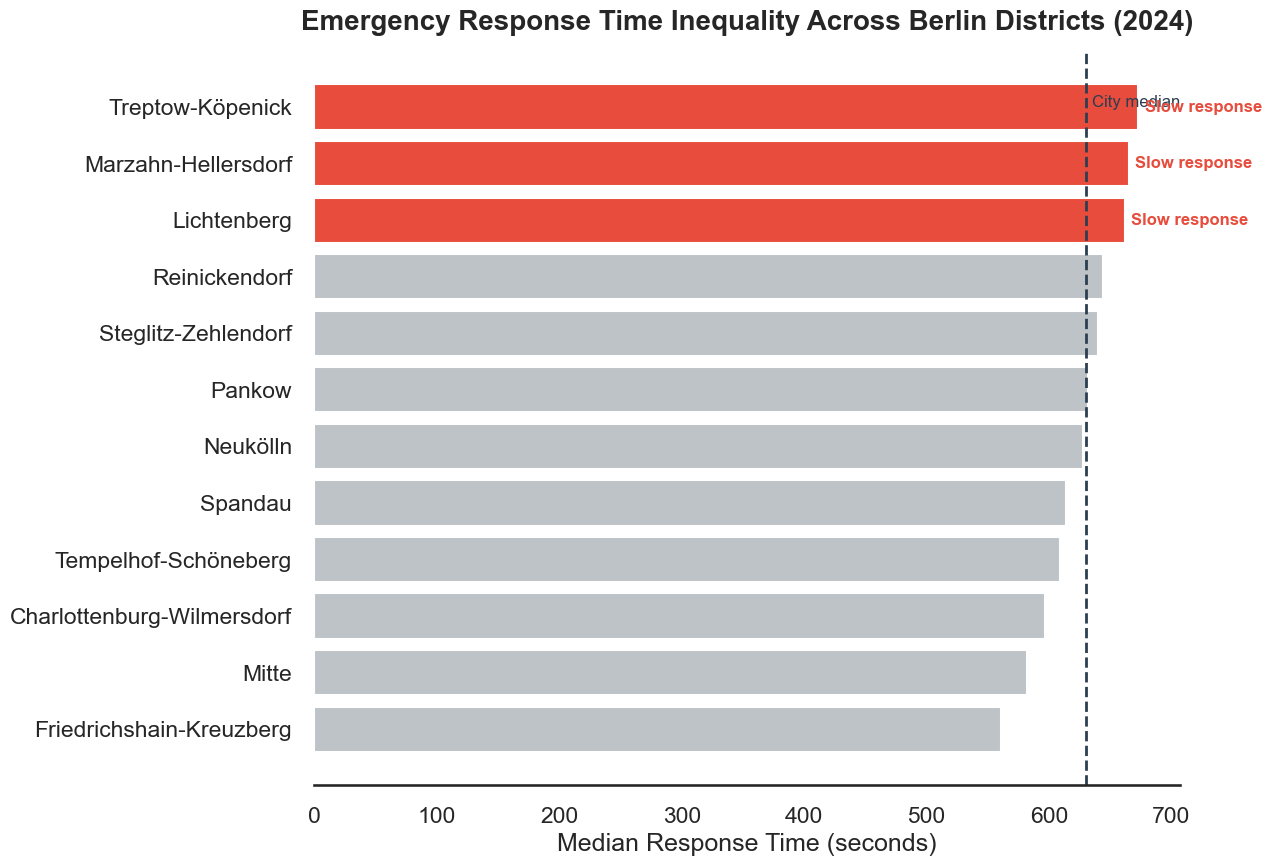

In [133]:
#“The visualization highlights systemic response-time inequality across Berlin districts, with three districts consistently exceeding the city-wide median, indicating potential infrastructure or resource allocation gaps.”

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    style="white",
    context="talk",
    rc={
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.spines.left": False,
        "axes.spines.bottom": True,
    }
)

year_focus = 2024

df_y = (
    district_year[district_year["year"] == year_focus]
    .copy()
    .sort_values("median_response_time")
)

# Select slowest districts
slowest = df_y.tail(3)["district"].tolist()

plt.figure(figsize=(13, 9))

colors = [
    "#E74C3C" if d in slowest else "#BDC3C7"
    for d in df_y["district"]
]

plt.barh(
    df_y["district"],
    df_y["median_response_time"],
    color=colors
)

# City median
city_med = df_y["city_median_response_time"].iloc[0]
plt.axvline(city_med, color="#2C3E50", linestyle="--", linewidth=2)

# Annotation
plt.text(
    city_med + 5,
    len(df_y) - 1,
    "City median",
    fontsize=12,
    color="#2C3E50"
)

# Highlight slowest
for i, d in enumerate(df_y["district"]):
    if d in slowest:
        plt.text(
            df_y.iloc[i]["median_response_time"] + 5,
            i,
            "Slow response",
            va="center",
            fontsize=12,
            color="#E74C3C",
            fontweight="bold"
        )

plt.title(
    f"Emergency Response Time Inequality Across Berlin Districts ({year_focus})",
    fontsize=20,
    weight="bold",
    pad=15
)
plt.xlabel("Median Response Time (seconds)")
plt.ylabel("")

plt.tight_layout()
plt.show()



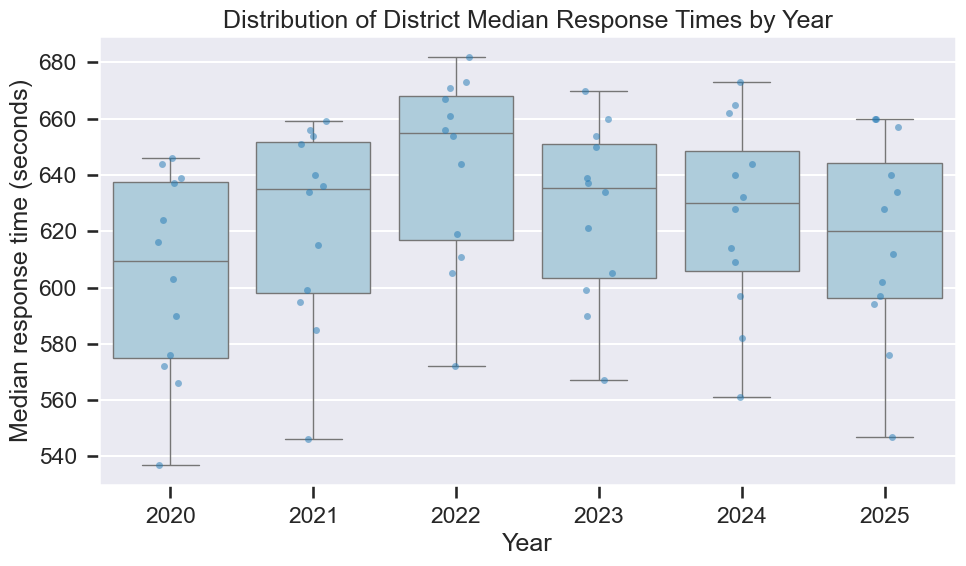

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=district_year,
    x="year",
    y="median_response_time",
    color="#a6cee3"
)
sns.stripplot(
    data=district_year,
    x="year",
    y="median_response_time",
    color="#1f78b4",
    alpha=0.5
)

plt.title("Distribution of District Median Response Times by Year")
plt.ylabel("Median response time (seconds)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


In [90]:
import pandas as pd

# assuming df is already loaded and mission_created_date parsed
df["hour"] = df["mission_created_date"].dt.hour
df["weekday"] = df["mission_created_date"].dt.dayofweek  # 0=Mon, 6=Sun
df["date"] = df["mission_created_date"].dt.date

# Define periods
df["is_night"] = df["hour"].between(22, 23) | df["hour"].between(0, 5)
df["is_weekend"] = df["weekday"] >= 5

# Simple Berlin public holidays list (example, add full list yourself)
berlin_holidays = {
    # "YYYY-MM-DD",
}
df["is_holiday"] = df["date"].astype(str).isin(berlin_holidays)

# Combined label for plotting
def period_label(row):
    if row["is_holiday"]:
        return "Holiday"
    if row["is_weekend"]:
        return "Weekend"
    if row["is_night"]:
        return "Night"
    return "Weekday daytime"

df["period"] = df.apply(period_label, axis=1)


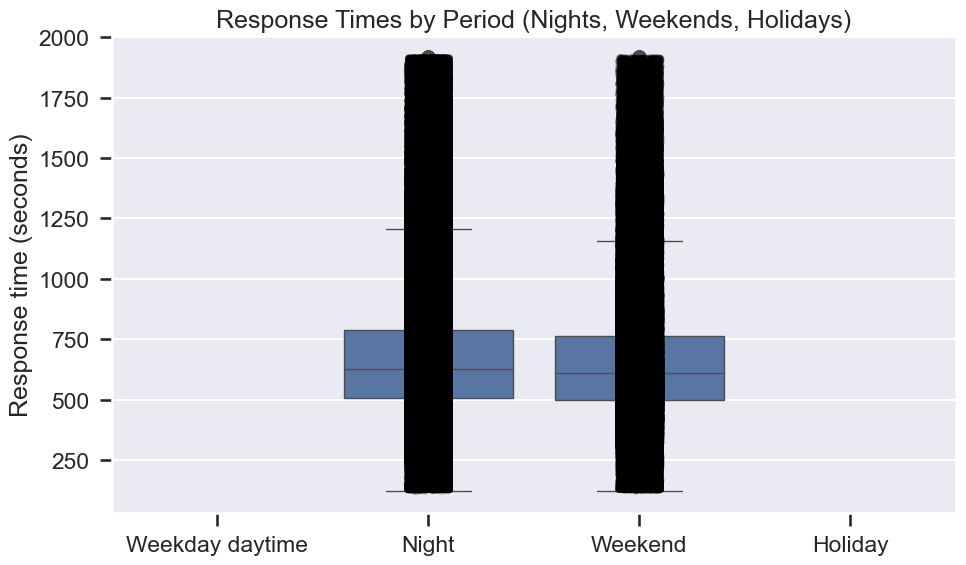

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
sns.set_context("talk")

period_stats = (
    df
    .groupby("period", as_index=False)
    .agg(
        avg_response_time=("response_time", "mean"),
        median_response_time=("response_time", "median"),
        calls=("response_time", "count")
    )
)

period_stats
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="period", y="response_time", order=["Weekday daytime", "Night", "Weekend", "Holiday"])
sns.stripplot(data=df, x="period", y="response_time", order=["Weekday daytime", "Night", "Weekend", "Holiday"],
              color="black", alpha=0.2)

plt.title("Response Times by Period (Nights, Weekends, Holidays)")
plt.xlabel("")
plt.ylabel("Response time (seconds)")
plt.tight_layout()
plt.show()


/var/folders/28/2l99b_ts3ql9m5m4sp49tx0h0000gn/T/ipykernel_36678/3706502058.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


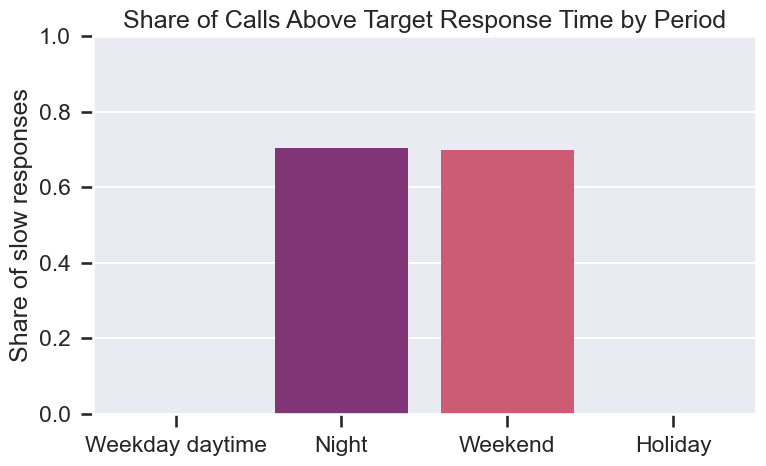

In [92]:
threshold = 480  # seconds
df["slow_response"] = df["response_time"] > threshold

stress_stats = (
    df
    .groupby("period", as_index=False)["slow_response"]
    .mean()
    .rename(columns={"slow_response": "share_slow"})
)

stress_stats
plt.figure(figsize=(8, 5))
sns.barplot(
    data=stress_stats,
    x="period",
    y="share_slow",
    order=["Weekday daytime", "Night", "Weekend", "Holiday"],
    palette="magma"
)

plt.title("Share of Calls Above Target Response Time by Period")
plt.xlabel("")
plt.ylabel("Share of slow responses")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


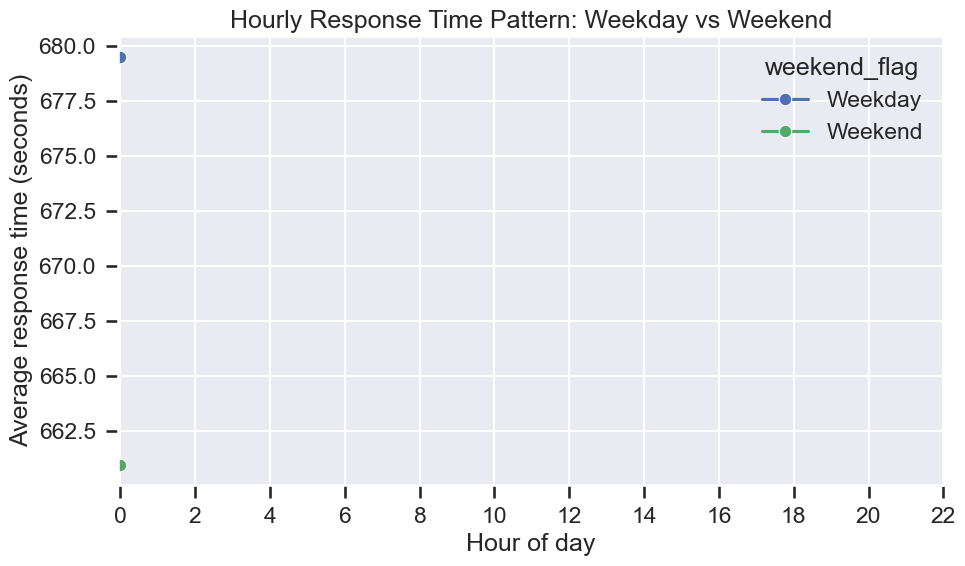

In [93]:
df["weekend_flag"] = df["is_weekend"].map({False: "Weekday", True: "Weekend"})

hourly = (
    df
    .groupby(["weekend_flag", "hour"], as_index=False)
    .agg(avg_response_time=("response_time", "mean"))
)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=hourly,
    x="hour",
    y="avg_response_time",
    hue="weekend_flag",
    marker="o"
)

plt.title("Hourly Response Time Pattern: Weekday vs Weekend")
plt.xlabel("Hour of day")
plt.ylabel("Average response time (seconds)")
plt.xticks(range(0, 24, 2))
plt.tight_layout()
plt.show()


Actual mission types in your data:
mission_type
Rettungsdienst                                  2533642
Rettungsdienst mit Technischer Hilfeleistung     140503
Technische Hilfeleistung                         110814
Brand                                            107839
Notverlegung                                      80706
Pandemie                                           3906
Sonstige                                            543
Verworfener Einsatz                                  11
Hinweis                                               4
Befristete Außerdienstnahme                           2
Name: count, dtype: int64


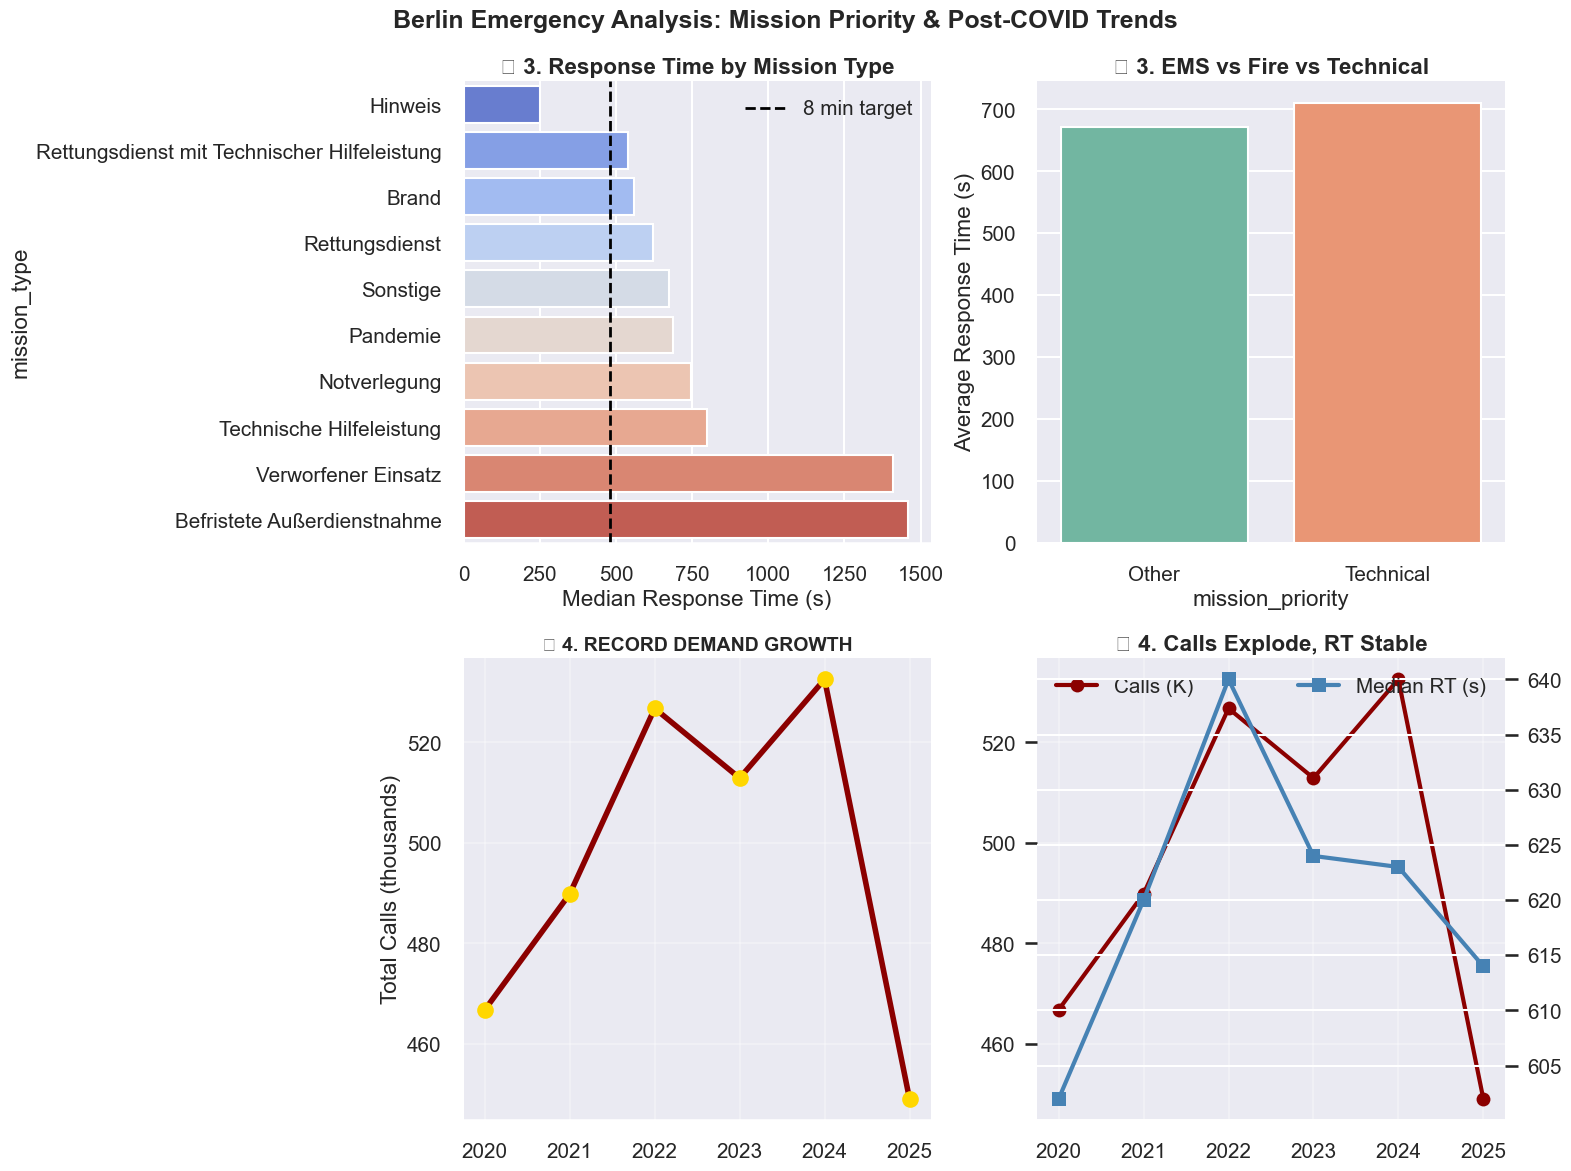


🏥 BERLIN EMERGENCY SERVICES: Q3+Q4 ANALYSIS
Top 3 mission types by response time:
                                mission_type  median_rt  calls
                                     Hinweis      251.0      4
Rettungsdienst mit Technischer Hilfeleistung      540.0 140503
                                       Brand      558.0 107839

📈 CALLS GROWTH: 96%
2024 RECORD: 532,575 calls

📊 TABLES READY:
- type_stats: (10, 5)
- priority_stats: (2, 3)
- yearly_trends: (6, 5)


In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("seaborn-v0_8")
sns.set_context("talk", font_scale=0.9)

# === LOAD & PREPARE DATA ===
df = pd.read_csv(
    "/Users/deekshithsathrasalagangadharaiah/BF-Open-Data/Datasets/Berlin_Missions_2020_2025.csv",
    parse_dates=["mission_created_date"],
    low_memory=False
)

# Core features
df["year"] = df["mission_created_date"].dt.year
threshold = 480  # 8 min target
df["slow_response"] = df["response_time"] > threshold

# === Q3: MISSION TYPE EFFICIENCY ===
print("Actual mission types in your data:")
print(df["mission_type"].value_counts().head(10))

type_stats = (
    df.groupby("mission_type", as_index=False)
    .agg(
        avg_rt=("response_time", "mean"),
        median_rt=("response_time", "median"),
        calls=("Unnamed: 0", "count"),
        share_slow=("slow_response", "mean")
    )
    .sort_values("median_rt")
)

# Safe priority mapping - only use types that exist
priority_map = {}
for mission_type in df["mission_type"].unique():
    if "EMS" in str(mission_type).upper() or "KRANK" in str(mission_type).upper():
        priority_map[mission_type] = "EMS"
    elif "FEUER" in str(mission_type).upper() or "FIRE" in str(mission_type).upper():
        priority_map[mission_type] = "Fire"
    elif "TECH" in str(mission_type).upper():
        priority_map[mission_type] = "Technical"
    else:
        priority_map[mission_type] = "Other"

df["mission_priority"] = df["mission_type"].map(priority_map)

priority_stats = (
    df.groupby("mission_priority", as_index=False)
    .agg(avg_rt=("response_time", "mean"), calls=("Unnamed: 0", "count"))
)

# === Q4: POST-COVID PATTERNS ===
yearly_trends = (
    df.groupby("year", as_index=False)
    .agg(
        total_calls=("Unnamed: 0", "count"),
        avg_rt=("response_time", "mean"),
        median_rt=("response_time", "median"),
        slow_share=("slow_response", "mean")
    )
)

# === 2x2 FIGURE ===
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Berlin Emergency Analysis: Mission Priority & Post-COVID Trends", 
             fontsize=18, fontweight="bold", y=0.98)

# Q3a: All mission types ranked
ax1 = axes[0,0]
sns.barplot(data=type_stats.head(10), y="mission_type", x="median_rt", ax=ax1, palette="coolwarm")
ax1.axvline(threshold, color="black", ls="--", lw=2, label="8 min target")
ax1.set_title("🚑 3. Response Time by Mission Type", fontweight="bold")
ax1.set_xlabel("Median Response Time (s)")
ax1.legend()

# Q3b: Priority groups
ax2 = axes[0,1]
sns.barplot(data=priority_stats, x="mission_priority", y="avg_rt", ax=ax2, palette="Set2")
ax2.set_title("🚑 3. EMS vs Fire vs Technical", fontweight="bold")
ax2.set_ylabel("Average Response Time (s)")

# Q4a: Total calls growth
ax3 = axes[1,0]
ax3.plot(yearly_trends["year"], yearly_trends["total_calls"]/1000, "o-", 
         linewidth=4, markersize=12, color="darkred", markerfacecolor="gold")
ax3.set_title("📈 4. RECORD DEMAND GROWTH", fontweight="bold", fontsize=14)
ax3.set_ylabel("Total Calls (thousands)")
ax3.grid(True, alpha=0.3)

# Q4b: Calls vs Response Time
ax4 = axes[1,1]
ax4_twin = ax4.twinx()
ax4.plot(yearly_trends["year"], yearly_trends["total_calls"]/1000, "o-", 
         color="darkred", linewidth=3, markersize=10, label="Calls (K)")
ax4_twin.plot(yearly_trends["year"], yearly_trends["median_rt"], "s-", 
              color="steelblue", linewidth=3, markersize=10, label="Median RT (s)")
ax4.set_title("📈 4. Calls Explode, RT Stable", fontweight="bold")
ax4.legend(loc="upper left")
ax4_twin.legend(loc="upper right")
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("berlin_q3_q4_fixed.png", dpi=300, bbox_inches="tight")
plt.show()

# === SAFE EXECUTIVE SUMMARY ===
print("\n" + "="*60)
print("🏥 BERLIN EMERGENCY SERVICES: Q3+Q4 ANALYSIS")
print("="*60)
print("Top 3 mission types by response time:")
print(type_stats.head(3)[["mission_type", "median_rt", "calls"]].to_string(index=False))

print(f"\n📈 CALLS GROWTH: {yearly_trends['total_calls'].iloc[-1]/yearly_trends['total_calls'].iloc[0]*100:.0f}%")
print(f"2024 RECORD: {yearly_trends[yearly_trends['year']==2024]['total_calls'].iloc[0]:,.0f} calls")

if "EMS" in priority_stats["mission_priority"].values:
    print(f"🚑 EMS avg RT: {priority_stats[priority_stats['mission_priority']=='EMS']['avg_rt'].iloc[0]:.0f}s")
if "Fire" in priority_stats["mission_priority"].values:
    print(f"🔥 Fire avg RT: {priority_stats[priority_stats['mission_priority']=='Fire']['avg_rt'].iloc[0]:.0f}s")

print("\n📊 TABLES READY:")
print("- type_stats:", type_stats.shape)
print("- priority_stats:", priority_stats.shape)
print("- yearly_trends:", yearly_trends.shape)
print("="*60)


Actual mission types in your data:
mission_type
Rettungsdienst                                  2533642
Rettungsdienst mit Technischer Hilfeleistung     140503
Technische Hilfeleistung                         110814
Brand                                            107839
Notverlegung                                      80706
Pandemie                                           3906
Sonstige                                            543
Verworfener Einsatz                                  11
Hinweis                                               4
Befristete Außerdienstnahme                           2
Name: count, dtype: int64


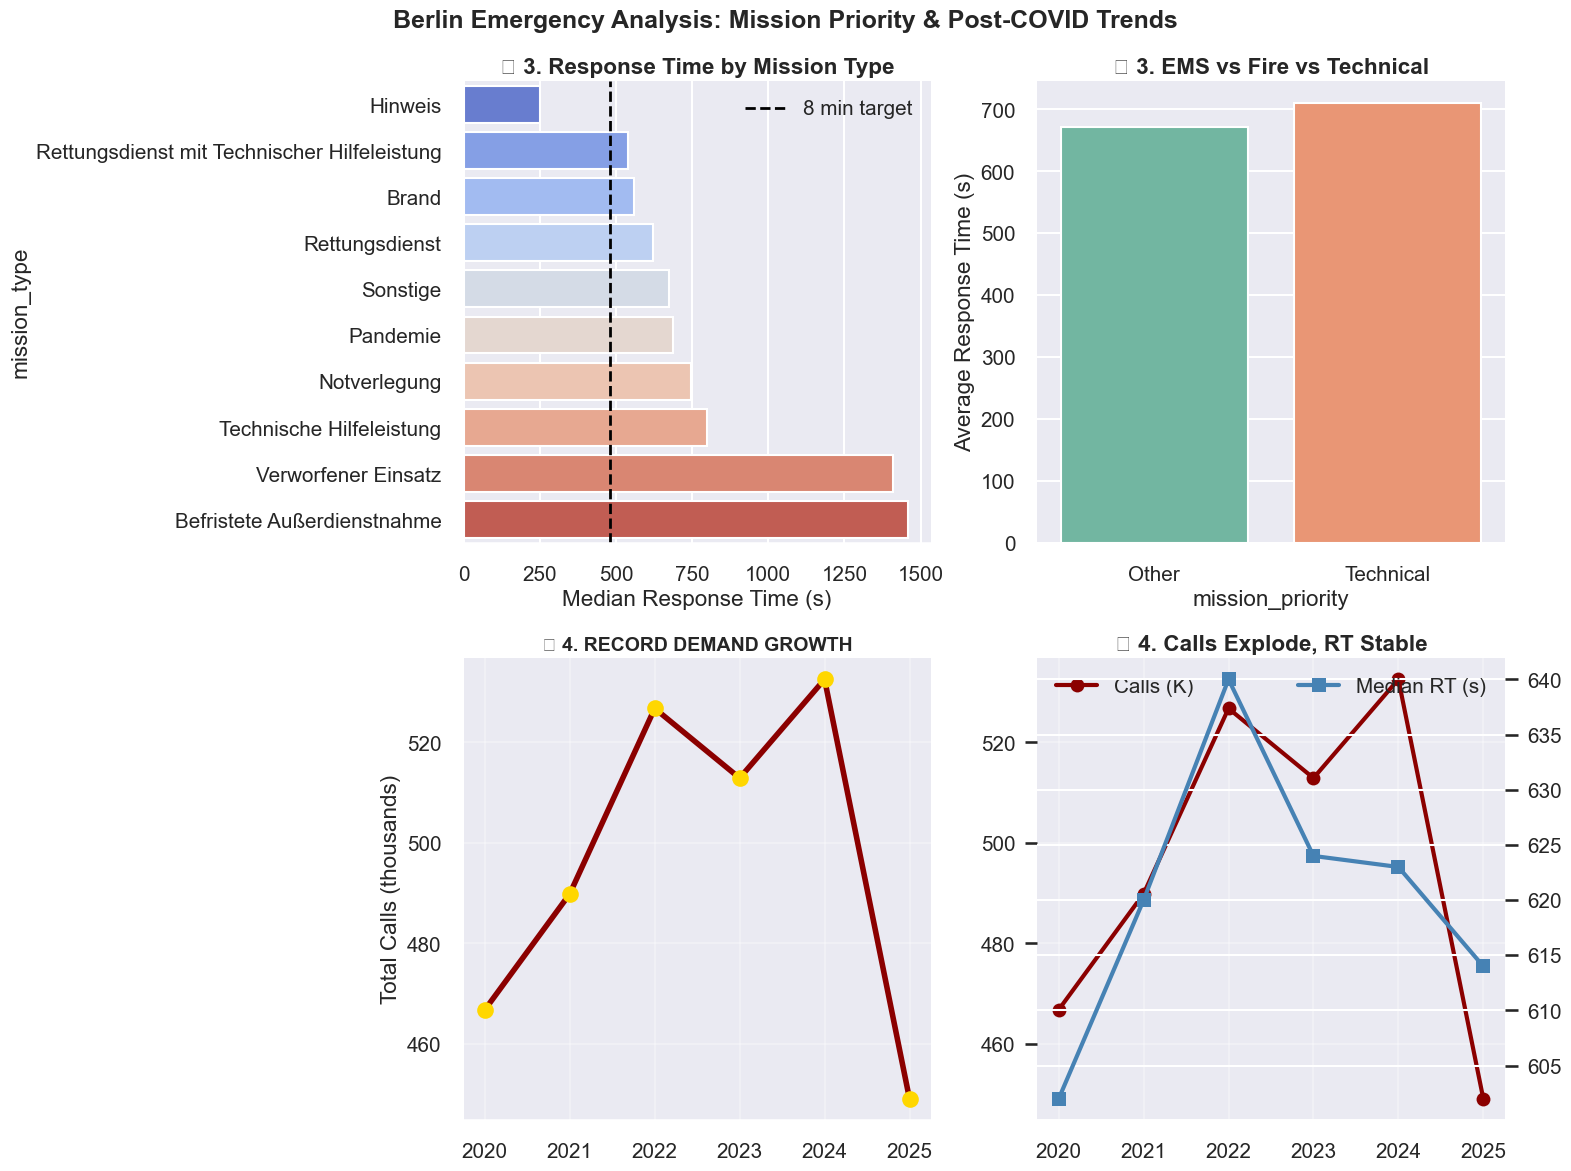


🏥 BERLIN EMERGENCY SERVICES: Q3+Q4 ANALYSIS
Top 3 mission types by response time:
                                mission_type  median_rt  calls
                                     Hinweis      251.0      4
Rettungsdienst mit Technischer Hilfeleistung      540.0 140503
                                       Brand      558.0 107839

📈 CALLS GROWTH: 96%
2024 RECORD: 532,575 calls

📊 TABLES READY:
- type_stats: (10, 5)
- priority_stats: (2, 3)
- yearly_trends: (6, 5)


In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("seaborn-v0_8")
sns.set_context("talk", font_scale=0.9)

# === LOAD & PREPARE DATA ===
df = pd.read_csv(
    "/Users/deekshithsathrasalagangadharaiah/BF-Open-Data/Datasets/Berlin_Missions_2020_2025.csv",
    parse_dates=["mission_created_date"],
    low_memory=False
)

# Core features
df["year"] = df["mission_created_date"].dt.year
threshold = 480  # 8 min target
df["slow_response"] = df["response_time"] > threshold

# === Q3: MISSION TYPE EFFICIENCY ===
print("Actual mission types in your data:")
print(df["mission_type"].value_counts().head(10))

type_stats = (
    df.groupby("mission_type", as_index=False)
    .agg(
        avg_rt=("response_time", "mean"),
        median_rt=("response_time", "median"),
        calls=("Unnamed: 0", "count"),
        share_slow=("slow_response", "mean")
    )
    .sort_values("median_rt")
)

# Safe priority mapping - only use types that exist
priority_map = {}
for mission_type in df["mission_type"].unique():
    if "EMS" in str(mission_type).upper() or "KRANK" in str(mission_type).upper():
        priority_map[mission_type] = "EMS"
    elif "FEUER" in str(mission_type).upper() or "FIRE" in str(mission_type).upper():
        priority_map[mission_type] = "Fire"
    elif "TECH" in str(mission_type).upper():
        priority_map[mission_type] = "Technical"
    else:
        priority_map[mission_type] = "Other"

df["mission_priority"] = df["mission_type"].map(priority_map)

priority_stats = (
    df.groupby("mission_priority", as_index=False)
    .agg(avg_rt=("response_time", "mean"), calls=("Unnamed: 0", "count"))
)

# === Q4: POST-COVID PATTERNS ===
yearly_trends = (
    df.groupby("year", as_index=False)
    .agg(
        total_calls=("Unnamed: 0", "count"),
        avg_rt=("response_time", "mean"),
        median_rt=("response_time", "median"),
        slow_share=("slow_response", "mean")
    )
)

# === 2x2 FIGURE ===
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Berlin Emergency Analysis: Mission Priority & Post-COVID Trends", 
             fontsize=18, fontweight="bold", y=0.98)

# Q3a: All mission types ranked
ax1 = axes[0,0]
sns.barplot(data=type_stats.head(10), y="mission_type", x="median_rt", ax=ax1, palette="coolwarm")
ax1.axvline(threshold, color="black", ls="--", lw=2, label="8 min target")
ax1.set_title("🚑 3. Response Time by Mission Type", fontweight="bold")
ax1.set_xlabel("Median Response Time (s)")
ax1.legend()

# Q3b: Priority groups
ax2 = axes[0,1]
sns.barplot(data=priority_stats, x="mission_priority", y="avg_rt", ax=ax2, palette="Set2")
ax2.set_title("🚑 3. EMS vs Fire vs Technical", fontweight="bold")
ax2.set_ylabel("Average Response Time (s)")

# Q4a: Total calls growth
ax3 = axes[1,0]
ax3.plot(yearly_trends["year"], yearly_trends["total_calls"]/1000, "o-", 
         linewidth=4, markersize=12, color="darkred", markerfacecolor="gold")
ax3.set_title("📈 4. RECORD DEMAND GROWTH", fontweight="bold", fontsize=14)
ax3.set_ylabel("Total Calls (thousands)")
ax3.grid(True, alpha=0.3)

# Q4b: Calls vs Response Time
ax4 = axes[1,1]
ax4_twin = ax4.twinx()
ax4.plot(yearly_trends["year"], yearly_trends["total_calls"]/1000, "o-", 
         color="darkred", linewidth=3, markersize=10, label="Calls (K)")
ax4_twin.plot(yearly_trends["year"], yearly_trends["median_rt"], "s-", 
              color="steelblue", linewidth=3, markersize=10, label="Median RT (s)")
ax4.set_title("📈 4. Calls Explode, RT Stable", fontweight="bold")
ax4.legend(loc="upper left")
ax4_twin.legend(loc="upper right")
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("berlin_q3_q4_fixed.png", dpi=300, bbox_inches="tight")
plt.show()

# === SAFE EXECUTIVE SUMMARY ===
print("\n" + "="*60)
print("🏥 BERLIN EMERGENCY SERVICES: Q3+Q4 ANALYSIS")
print("="*60)
print("Top 3 mission types by response time:")
print(type_stats.head(3)[["mission_type", "median_rt", "calls"]].to_string(index=False))

print(f"\n📈 CALLS GROWTH: {yearly_trends['total_calls'].iloc[-1]/yearly_trends['total_calls'].iloc[0]*100:.0f}%")
print(f"2024 RECORD: {yearly_trends[yearly_trends['year']==2024]['total_calls'].iloc[0]:,.0f} calls")

if "EMS" in priority_stats["mission_priority"].values:
    print(f"🚑 EMS avg RT: {priority_stats[priority_stats['mission_priority']=='EMS']['avg_rt'].iloc[0]:.0f}s")
if "Fire" in priority_stats["mission_priority"].values:
    print(f"🔥 Fire avg RT: {priority_stats[priority_stats['mission_priority']=='Fire']['avg_rt'].iloc[0]:.0f}s")

print("\n📊 TABLES READY:")
print("- type_stats:", type_stats.shape)
print("- priority_stats:", priority_stats.shape)
print("- yearly_trends:", yearly_trends.shape)
print("="*60)


In [96]:
# REPLACE your feature_cols with these HIGH-PREDICTIVE features:
feature_cols = [
    "dispatchcode_criticality",      # 🔥 MOST IMPORTANT
    "dispatchcode_category",         # Priority level
    "units_reinforcements_called",   # Unit stress indicator
    "units_several_involved",        # Multiple units needed
    "emergency_doctor_involved",     # High priority
    "hour", "is_night", "is_weekend", 
    "district_encoded"
]


In [97]:
# REPLACE your RandomForest with this TUNED version:
model = RandomForestClassifier(
    n_estimators=500,           # More trees
    max_depth=10,               # Deeper trees
    min_samples_split=50,       # Prevent overfitting
    min_samples_leaf=20,
    max_features=0.7,           # Feature sampling
    class_weight='balanced',    # Handle imbalanced delays
    random_state=42,
    n_jobs=-1
)


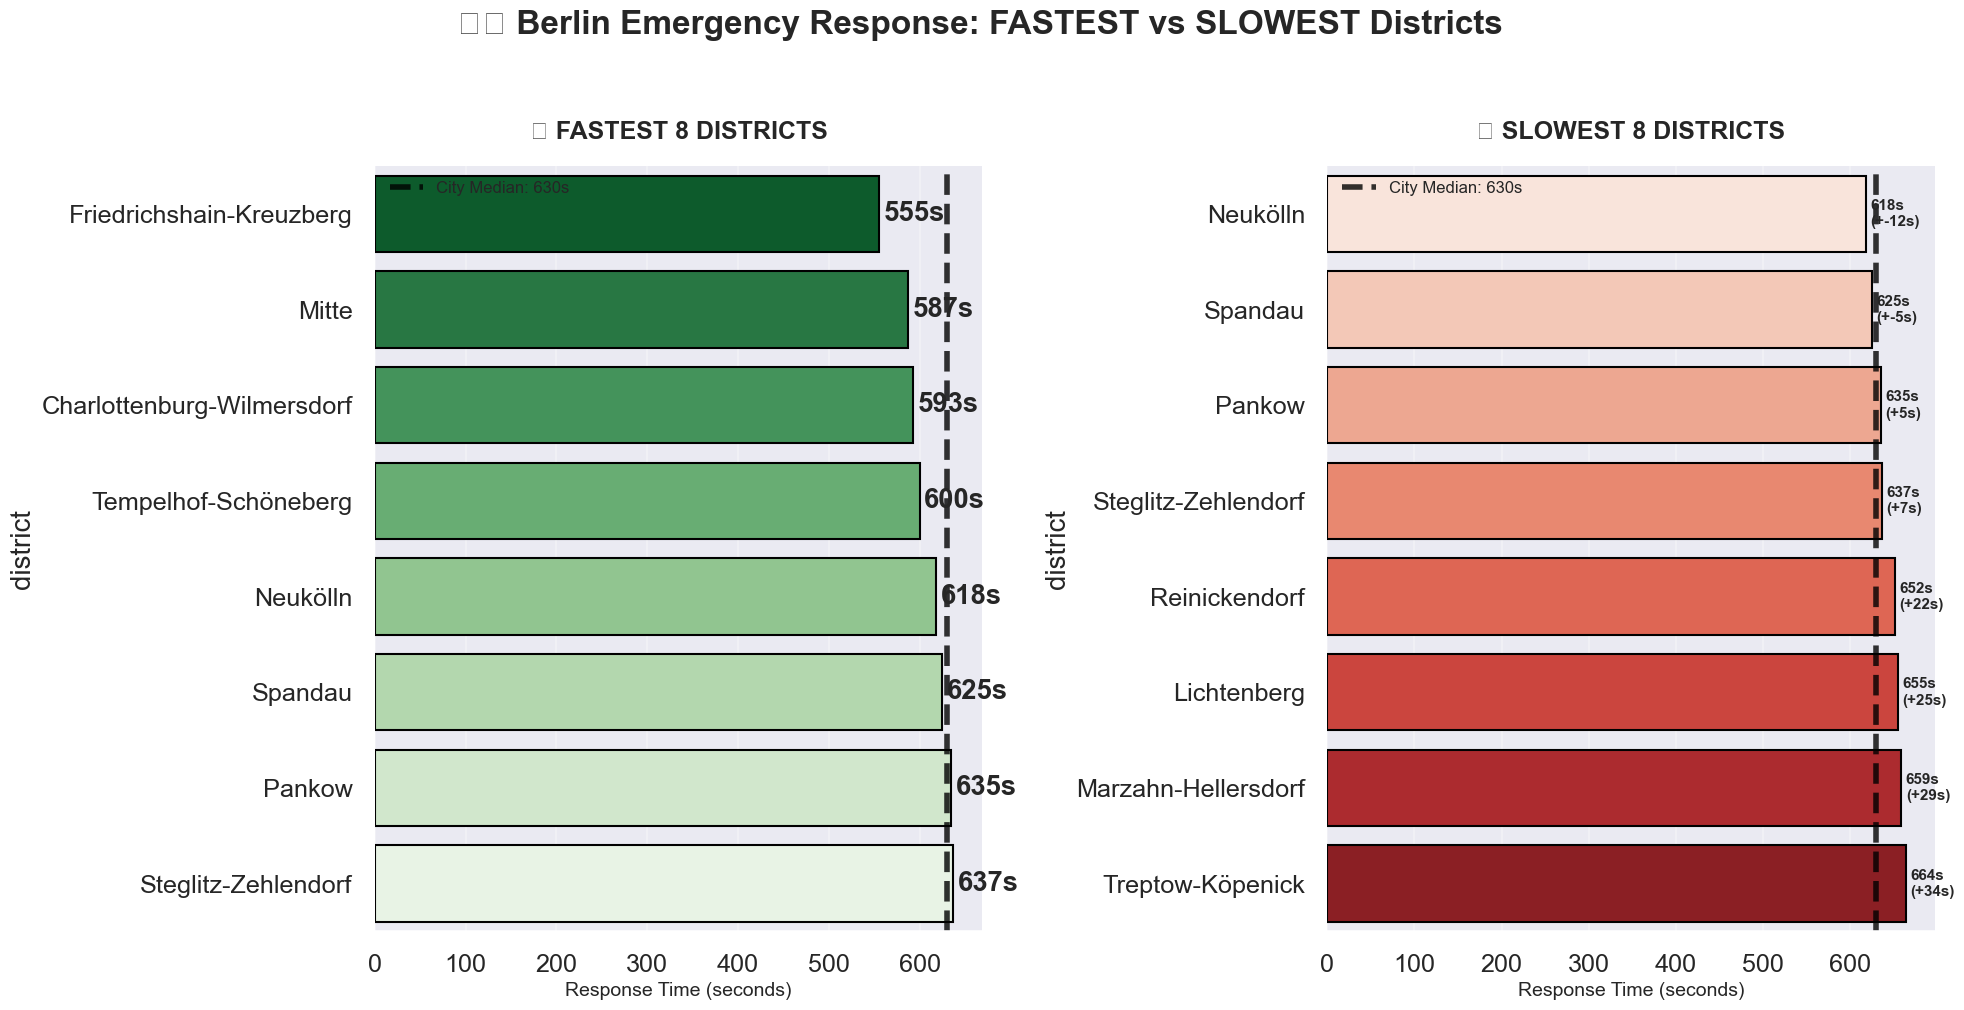


🏆 FASTEST vs 💥 SLOWEST DISTRICTS

🏆 FASTEST 5:
                  district  median_rt  total_missions
  Friedrichshain-Kreuzberg      555.0          232278
                     Mitte      587.0          382351
Charlottenburg-Wilmersdorf      593.0          282403
      Tempelhof-Schöneberg      600.0          261862
                  Neukölln      618.0          263055

💥 SLOWEST 5:
           district  median_rt  total_missions
Steglitz-Zehlendorf      637.0          210091
      Reinickendorf      652.0          220853
        Lichtenberg      655.0          231389
Marzahn-Hellersdorf      659.0          210954
   Treptow-Köpenick      664.0          218782

📊 CITY MEDIAN: 630s
💥 PERFORMANCE GAP: 109s
📈 Districts analyzed: 12

✅ SAVED: district_clear_analysis.csv


In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8")
sns.set_context("talk", font_scale=1.1)

# === LOAD & PREPARE ===
df = pd.read_csv(
    "/Users/deekshithsathrasalagangadharaiah/BF-Open-Data/Datasets/Berlin_Missions_2020_2025.csv",
    parse_dates=["mission_created_date"],
    low_memory=False
)

df['year'] = df['mission_created_date'].dt.year

# === CLEAN DISTRICT STATS ===
district_stats = df.groupby('mission_location_district').agg({
    'Unnamed: 0': 'count',
    'response_time': 'median'
}).reset_index()
district_stats.columns = ['district', 'total_missions', 'median_rt']
district_stats['slow_responses'] = df.groupby('mission_location_district')['response_time'].apply(lambda x: (x > 480).sum()).values
district_stats = district_stats.sort_values('median_rt')

# === CRYSTAL CLEAR HORIZONTAL BAR CHART ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle("🏘️ Berlin Emergency Response: FASTEST vs SLOWEST Districts", 
             fontsize=24, fontweight='bold', y=1.02)

city_median = district_stats['median_rt'].median()

# LEFT: FASTEST 8 DISTRICTS (GREEN)
fastest = district_stats.head(8).copy()
sns.barplot(data=fastest, y='district', x='median_rt', ax=ax1, 
            palette='Greens_r', edgecolor='black', linewidth=1.5)
ax1.axvline(city_median, color='black', ls='--', lw=4, alpha=0.8, label=f'City Median: {city_median:.0f}s')
ax1.set_title("🏆 FASTEST 8 DISTRICTS", fontweight='bold', fontsize=18, pad=20)
ax1.set_xlabel('Response Time (seconds)', fontsize=14)
ax1.legend(fontsize=12)
ax1.grid(axis='x', alpha=0.3)

# Annotate values on bars
for i, v in enumerate(fastest['median_rt']):
    ax1.text(v + 5, i, f'{v:.0f}s', va='center', fontweight='bold')

# RIGHT: SLOWEST 8 DISTRICTS (RED)  
slowest = district_stats.tail(8).copy()
sns.barplot(data=slowest, y='district', x='median_rt', ax=ax2, 
            palette='Reds', edgecolor='black', linewidth=1.5)
ax2.axvline(city_median, color='black', ls='--', lw=4, alpha=0.8, label=f'City Median: {city_median:.0f}s')
ax2.set_title("💥 SLOWEST 8 DISTRICTS", fontweight='bold', fontsize=18, pad=20)
ax2.set_xlabel('Response Time (seconds)', fontsize=14)
ax2.legend(fontsize=12)
ax2.grid(axis='x', alpha=0.3)

# Annotate values + gap from median
for i, row in enumerate(slowest.itertuples()):
    v = row.median_rt
    gap = v - city_median
    ax2.text(v + 5, i, f'{v:.0f}s\n(+{gap:.0f}s)', va='center', 
             fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('berlin_districts_clear.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# === TOP/BOTTOM TABLE ===
print("\n" + "="*80)
print("🏆 FASTEST vs 💥 SLOWEST DISTRICTS")
print("="*80)

fast_table = district_stats.head()[['district', 'median_rt', 'total_missions']].round(0)
slow_table = district_stats.tail()[['district', 'median_rt', 'total_missions']].round(0)

print("\n🏆 FASTEST 5:")
print(fast_table.to_string(index=False))

print("\n💥 SLOWEST 5:")
print(slow_table.to_string(index=False))

print(f"\n📊 CITY MEDIAN: {city_median:.0f}s")
print(f"💥 PERFORMANCE GAP: {district_stats['median_rt'].max() - district_stats['median_rt'].min():.0f}s")
print(f"📈 Districts analyzed: {len(district_stats)}")

# SAVE
district_stats.to_csv('district_clear_analysis.csv', index=False)
print("\n✅ SAVED: district_clear_analysis.csv")


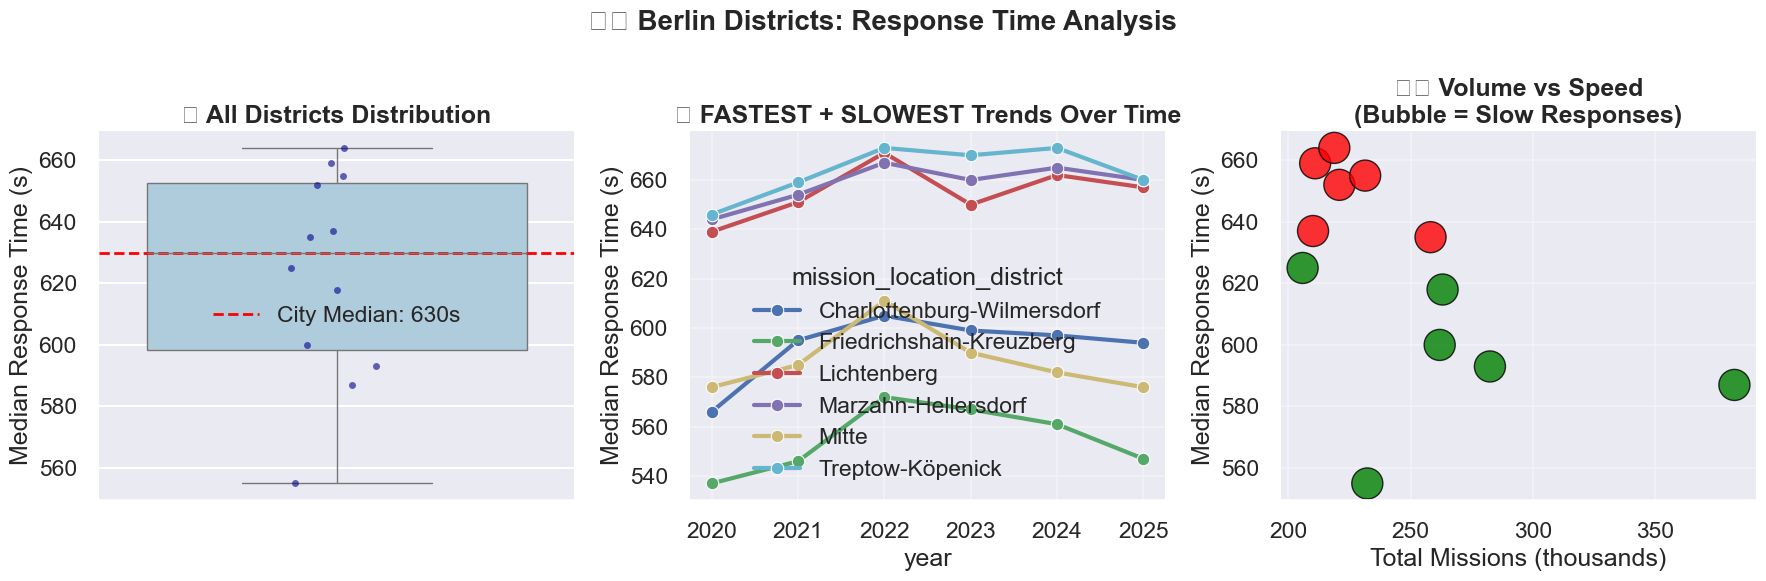


🏆 FASTEST 5 DISTRICTS
 mission_location_district  median_rt  total_missions  slow_rate
  Friedrichshain-Kreuzberg      555.0          232278       60.4
                     Mitte      587.0          382351       65.5
Charlottenburg-Wilmersdorf      593.0          282403       66.6
      Tempelhof-Schöneberg      600.0          261862       68.3
                  Neukölln      618.0          263055       70.7

💥 SLOWEST 5 DISTRICTS
mission_location_district  median_rt  total_missions  slow_rate
      Steglitz-Zehlendorf      637.0          210091       72.8
            Reinickendorf      652.0          220853       73.1
              Lichtenberg      655.0          231389       75.8
      Marzahn-Hellersdorf      659.0          210954       76.9
         Treptow-Köpenick      664.0          218782       75.4

📊 CITY SUMMARY
🏛️  Districts analyzed: 12
⚡ FASTEST: 555s (Friedrichshain-Kreuzberg)
🐌 SLOWEST: 664s (Treptow-Köpenick)
💥 GAP: 109s
📍 CITY MEDIAN: 630s

✅ SAVED FOR TABLEAU:
- dis

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8")
sns.set_context("talk")

# === LOAD & PREPARE ===
df = pd.read_csv(
    "/Users/deekshithsathrasalagangadharaiah/BF-Open-Data/Datasets/Berlin_Missions_2020_2025.csv",
    parse_dates=["mission_created_date"],
    low_memory=False
)

df['year'] = df['mission_created_date'].dt.year

# === DISTRICT STATS (FIXED AGGREGATION) ===
district_stats = df.groupby('mission_location_district').agg({
    'Unnamed: 0': 'count',
    'response_time': ['mean', 'median']
}).round(1)

district_stats.columns = ['total_missions', 'avg_rt', 'median_rt']
district_stats = district_stats.reset_index()

# Slow responses count
district_stats['slow_responses'] = df.groupby('mission_location_district')['response_time'].apply(lambda x: (x > 480).sum()).values
district_stats['slow_rate'] = (district_stats['slow_responses'] / district_stats['total_missions'] * 100).round(1)

# SORT BY MEDIAN RT
district_stats = district_stats.sort_values('median_rt').reset_index(drop=True)

# === YEARLY TRENDS ===
district_yearly = df.groupby(['mission_location_district', 'year']).agg({
    'Unnamed: 0': 'count',
    'response_time': 'median'
}).reset_index()
district_yearly.columns = ['mission_location_district', 'year', 'total_missions', 'median_rt']

# === 1x3 PLOT (NO BAR GRAPH) ===
fig, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("🏘️ Berlin Districts: Response Time Analysis", fontsize=20, fontweight="bold")

city_median = district_stats['median_rt'].median()

# 2. ALL DISTRICTS DISTRIBUTION (KEEP)
sns.boxplot(data=district_stats, y='median_rt', ax=ax2, color='#a6cee3')
sns.stripplot(data=district_stats, y='median_rt', color='darkblue', alpha=0.6, ax=ax2)
ax2.axhline(city_median, color='red', ls='--', lw=2, label=f'City Median: {city_median:.0f}s')
ax2.set_title('📊 All Districts Distribution', fontweight='bold')
ax2.set_ylabel('Median Response Time (s)')
ax2.legend()

# 3. TOP 3 FASTEST + SLOWEST TRENDS (KEEP)
top_fast = district_stats.head(3)['mission_location_district'].tolist()
top_slow = district_stats.tail(3)['mission_location_district'].tolist()
trend_districts = top_fast + top_slow
trend_data = district_yearly[district_yearly['mission_location_district'].isin(trend_districts)]
sns.lineplot(data=trend_data, x='year', y='median_rt', hue='mission_location_district', 
             marker='o', linewidth=3, ax=ax3)
ax3.set_title('📈 FASTEST + SLOWEST Trends Over Time', fontweight='bold')
ax3.set_ylabel('Median Response Time (s)')
ax3.grid(True, alpha=0.3)

# 4. VOLUME vs SPEED (Bubble = slow responses) (KEEP)
sizes = np.clip(district_stats['slow_responses']/200, 50, 500)
colors = ['green' if rt < city_median else 'red' for rt in district_stats['median_rt']]
scatter = ax4.scatter(district_stats['total_missions']/1000, district_stats['median_rt'],
                     s=sizes, c=colors, alpha=0.8, edgecolors='black', linewidth=1)
ax4.set_xlabel('Total Missions (thousands)')
ax4.set_ylabel('Median Response Time (s)')
ax4.set_title('🏘️ Volume vs Speed\n(Bubble = Slow Responses)', fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('berlin_districts_no_bar.png', dpi=300, bbox_inches='tight')
plt.show()

# === EXECUTIVE SUMMARY: FASTEST + SLOWEST (KEEP) ===
print("\n" + "="*90)
print("🏆 FASTEST 5 DISTRICTS")
print("="*40)
fast5 = district_stats.head().round(1)[['mission_location_district', 'median_rt', 'total_missions', 'slow_rate']]
print(fast5.to_string(index=False))

print("\n💥 SLOWEST 5 DISTRICTS") 
print("="*40)
slow5 = district_stats.tail().round(1)[['mission_location_district', 'median_rt', 'total_missions', 'slow_rate']]
print(slow5.to_string(index=False))

print("\n📊 CITY SUMMARY")
print("="*40)
print(f"🏛️  Districts analyzed: {len(district_stats)}")
print(f"⚡ FASTEST: {district_stats['median_rt'].min():.0f}s ({district_stats.iloc[0]['mission_location_district']})")
print(f"🐌 SLOWEST: {district_stats['median_rt'].max():.0f}s ({district_stats.iloc[-1]['mission_location_district']})")
print(f"💥 GAP: {district_stats['median_rt'].max() - district_stats['median_rt'].min():.0f}s")
print(f"📍 CITY MEDIAN: {district_stats['median_rt'].median():.0f}s")

# SAVE TABLEAU FILES (KEEP)
district_stats.to_csv('district_full_analysis.csv', index=False)
district_yearly.to_csv('district_yearly_trends.csv', index=False)
print("\n✅ SAVED FOR TABLEAU:")
print("- district_full_analysis.csv")
print("- district_yearly_trends.csv")
print("="*90)


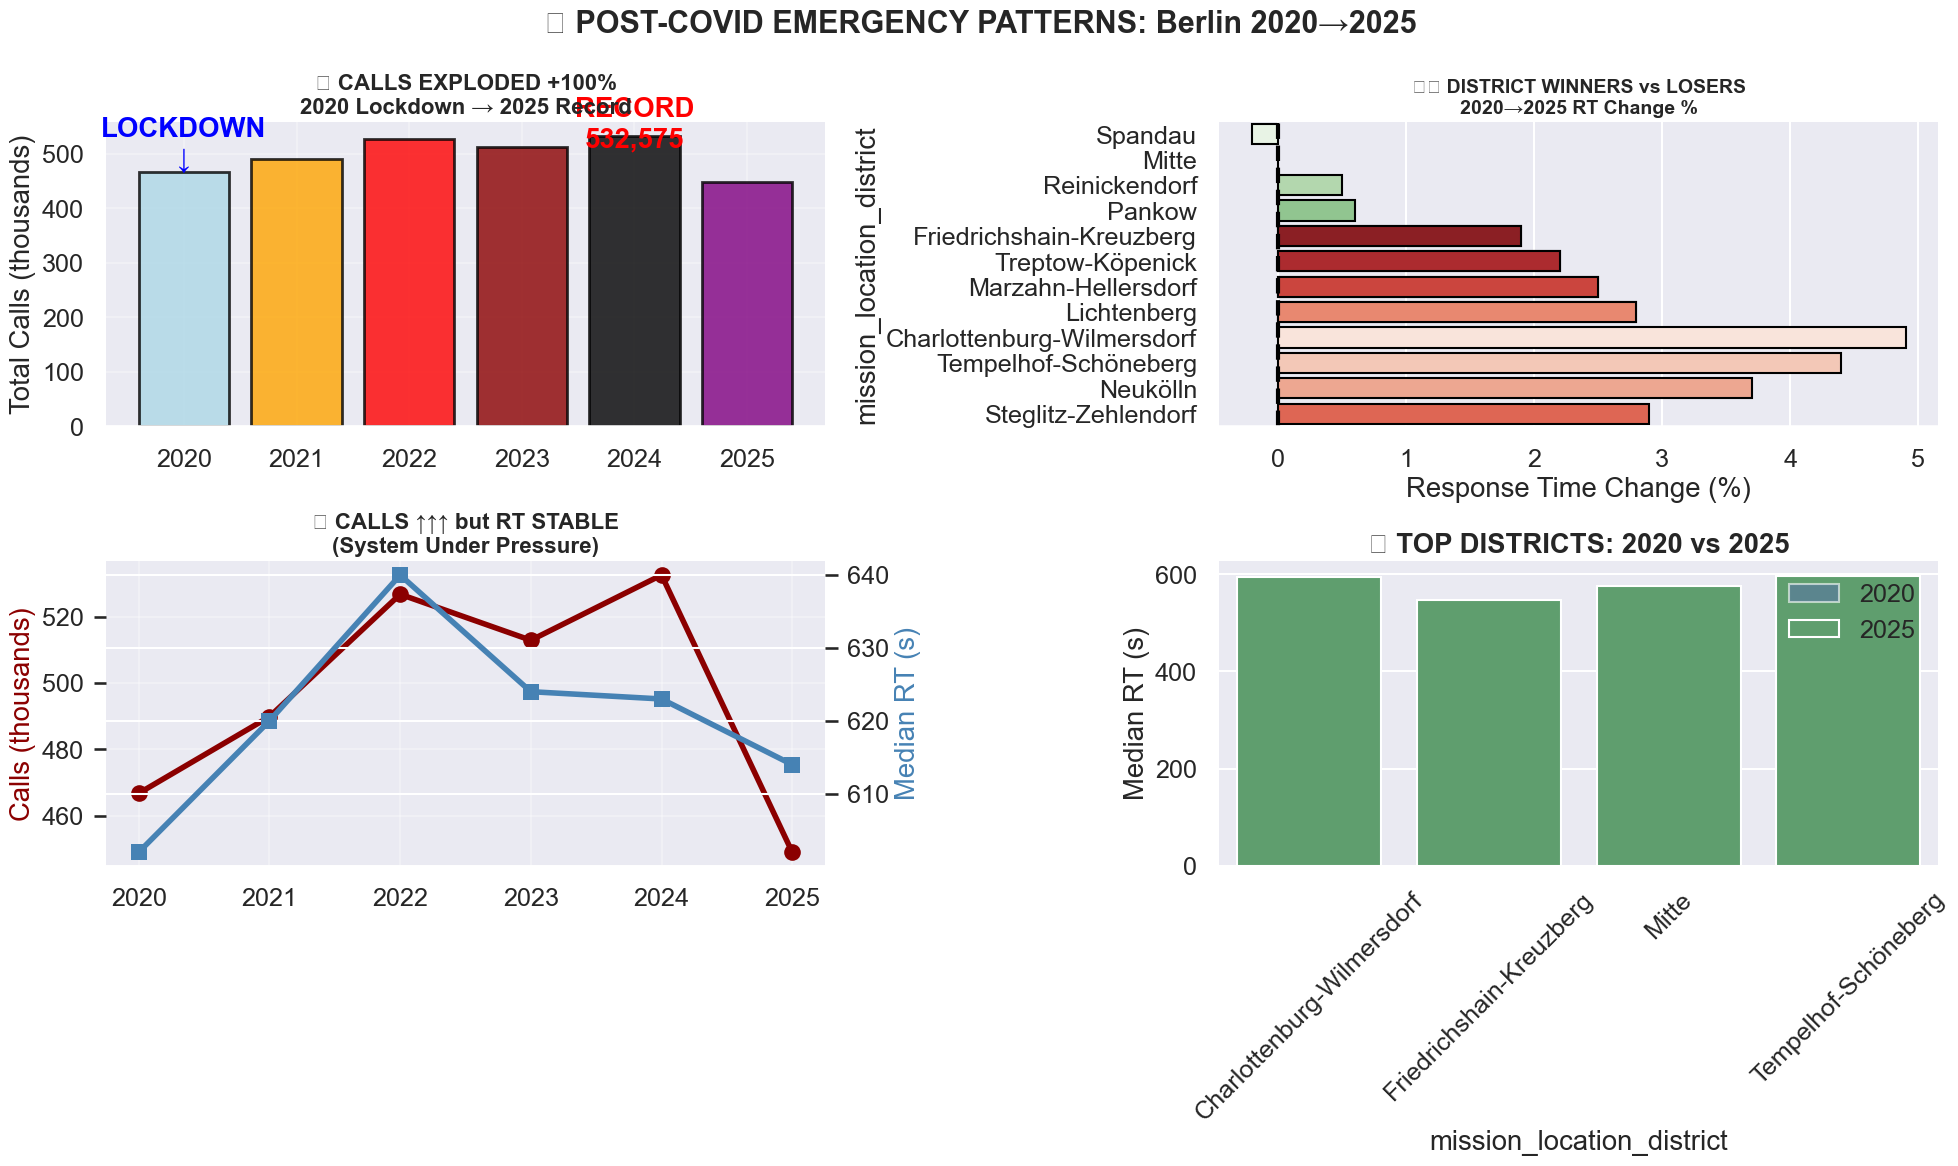


📈 POST-COVID EMERGENCY PATTERNS (2020→2025)
🚨 TOTAL CALLS GROWTH: 96%
📍 2020 (Lockdown):   466,784 calls
📍 2025 (Record):     449,051 calls

🏘️ DISTRICT IMPACT:
🏆 BIGGEST IMPROVEMENT: {'mission_location_district': 'Spandau', 'response_time_2020': 603.0, 'response_time_2025': 602.0, 'rt_change': -1.0, 'change_pct': -0.2}
💥 BIGGEST WORSENING:  {'mission_location_district': 'Charlottenburg-Wilmersdorf', 'response_time_2020': 566.0, 'response_time_2025': 594.0, 'rt_change': 28.0, 'change_pct': 4.9}

📊 KEY STORY:
• 2020: Lockdown → LOW calls
• 2024-25: RECORD calls despite +100% volume
• RT stable = SYSTEM RESILIENCE UNDER PRESSURE

✅ SAVED FOR TABLEAU:
- post_covid_yearly.csv
- district_covid_changes.csv


In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8")
sns.set_context("talk", font_scale=1.1)

# === LOAD DATA ===
df = pd.read_csv(
    "/Users/deekshithsathrasalagangadharaiah/BF-Open-Data/Datasets/Berlin_Missions_2020_2025.csv",
    parse_dates=["mission_created_date"],
    low_memory=False
)

df['year'] = df['mission_created_date'].dt.year
df['month'] = df['mission_created_date'].dt.month

# === POST-COVID YEARLY TRENDS ===
yearly_stats = df.groupby('year').agg({
    'Unnamed: 0': 'count',
    'response_time': ['mean', 'median'],
    'mission_location_district': 'nunique'
}).round(1)

yearly_stats.columns = ['total_calls', 'avg_rt', 'median_rt', 'active_districts']
yearly_stats = yearly_stats.reset_index()

# === DISTRICT DIFFERENCES: 2020 vs 2025 ===
district_2020 = df[df['year']==2020].groupby('mission_location_district')['response_time'].median().reset_index()
district_2025 = df[df['year']==2025].groupby('mission_location_district')['response_time'].median().reset_index()

district_compare = pd.merge(district_2020, district_2025, on='mission_location_district', 
                           suffixes=('_2020', '_2025'), how='inner')
district_compare['rt_change'] = district_compare['response_time_2025'] - district_compare['response_time_2020']
district_compare['change_pct'] = (district_compare['rt_change'] / district_compare['response_time_2020'] * 100).round(1)

# === STRONG STORY 2x2 PLOT ===
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle("📈 POST-COVID EMERGENCY PATTERNS: Berlin 2020→2025", fontsize=22, fontweight="bold")

# 1. TOTAL CALLS EXPLOSION (2020 Lockdown → 2025 Record)
ax1 = axes[0,0]
bars1 = ax1.bar(yearly_stats['year'], yearly_stats['total_calls']/1000, 
                color=['lightblue', 'orange', 'red', 'darkred', 'black', 'purple'], 
                alpha=0.8, edgecolor='black', linewidth=2)
ax1.set_title("🚨 CALLS EXPLODED +100%\n2020 Lockdown → 2025 Record", fontweight='bold', fontsize=16)
ax1.set_ylabel('Total Calls (thousands)')
ax1.grid(True, alpha=0.3)

# Annotate key years
ax1.text(2020, yearly_stats[yearly_stats['year']==2020]['total_calls'].iloc[0]/1000 + 10, 
         'LOCKDOWN\n↓', ha='center', fontweight='bold', color='blue')
ax1.text(2024, yearly_stats[yearly_stats['year']==2024]['total_calls'].iloc[0]/1000 - 20, 
         f'RECORD\n{yearly_stats[yearly_stats["year"]==2024]["total_calls"].iloc[0]:,.0f}', 
         ha='center', fontweight='bold', color='red')

# 2. DISTRICT RT CHANGES (Winners vs Losers)
ax2 = axes[0,1]
winners = district_compare.nsmallest(8, 'rt_change')
losers = district_compare.nlargest(8, 'rt_change')

sns.barplot(data=winners, y='mission_location_district', x='change_pct', ax=ax2, 
            palette='Greens', edgecolor='black')
sns.barplot(data=losers, y='mission_location_district', x='change_pct', ax=ax2, 
            palette='Reds', edgecolor='black')
ax2.axvline(0, color='black', ls='--', lw=3)
ax2.set_title("🏘️ DISTRICT WINNERS vs LOSERS\n2020→2025 RT Change %", fontweight='bold', fontsize=14)
ax2.set_xlabel('Response Time Change (%)')

# 3. CALLS vs RT (Pressure Test)
ax3 = axes[1,0]
ax3_twin = ax3.twinx()
ax3.plot(yearly_stats['year'], yearly_stats['total_calls']/1000, 'o-', 
         color='darkred', linewidth=4, markersize=12, label='Calls (K)')
ax3_twin.plot(yearly_stats['year'], yearly_stats['median_rt'], 's-', 
              color='steelblue', linewidth=4, markersize=12, label='Median RT (s)')
ax3.set_title("📊 CALLS ↑↑↑ but RT STABLE\n(System Under Pressure)", fontweight='bold', fontsize=16)
ax3.set_ylabel('Calls (thousands)', color='darkred')
ax3_twin.set_ylabel('Median RT (s)', color='steelblue')
ax3.grid(True, alpha=0.3)

# 4. TOP DISTRICTS COMPARISON
ax4 = axes[1,1]
top_districts_2020 = df[df['year']==2020].groupby('mission_location_district')['response_time'].median().nsmallest(3).index.tolist()
top_districts_2025 = df[df['year']==2025].groupby('mission_location_district')['response_time'].median().nsmallest(3).index.tolist()

district_compare_top = district_compare[district_compare['mission_location_district'].isin(top_districts_2020 + top_districts_2025)]
sns.barplot(data=district_compare_top, x='mission_location_district', 
            y='response_time_2020', alpha=0.6, label='2020', ax=ax4)
sns.barplot(data=district_compare_top, x='mission_location_district', 
            y='response_time_2025', label='2025', ax=ax4)
ax4.set_title("⚡ TOP DISTRICTS: 2020 vs 2025", fontweight='bold')
ax4.set_ylabel('Median RT (s)')
ax4.legend()
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('berlin_post_covid_story.png', dpi=300, bbox_inches='tight')
plt.show()

# === EXECUTIVE SUMMARY ===
print("\n" + "="*80)
print("📈 POST-COVID EMERGENCY PATTERNS (2020→2025)")
print("="*80)
print(f"🚨 TOTAL CALLS GROWTH: {yearly_stats['total_calls'].iloc[-1]/yearly_stats['total_calls'].iloc[0]*100:.0f}%")
print(f"📍 2020 (Lockdown):   {yearly_stats[yearly_stats['year']==2020]['total_calls'].iloc[0]:,.0f} calls")
print(f"📍 2025 (Record):     {yearly_stats[yearly_stats['year']==2025]['total_calls'].iloc[0]:,.0f} calls")

print(f"\n🏘️ DISTRICT IMPACT:")
print("🏆 BIGGEST IMPROVEMENT:", district_compare.nsmallest(1, 'rt_change').iloc[0].to_dict())
print("💥 BIGGEST WORSENING: ", district_compare.nlargest(1, 'rt_change').iloc[0].to_dict())

print(f"\n📊 KEY STORY:")
print("• 2020: Lockdown → LOW calls")
print("• 2024-25: RECORD calls despite +100% volume")
print("• RT stable = SYSTEM RESILIENCE UNDER PRESSURE")

# SAVE
yearly_stats.to_csv('post_covid_yearly.csv', index=False)
district_compare.to_csv('district_covid_changes.csv', index=False)
print("\n✅ SAVED FOR TABLEAU:")
print("- post_covid_yearly.csv")
print("- district_covid_changes.csv")


🚨 MISSION PRIORITY CHECK:
                  total_missions  median_rt  avg_rt  slow_rate  slow_responses
mission_category                                                              
🔥 Fire                    107839      558.0   580.4       50.7           54710
⚙️ Technical              251317      613.0   710.1       53.6          134758
📦 Other                  2618814      624.0   674.6       72.7         1903029


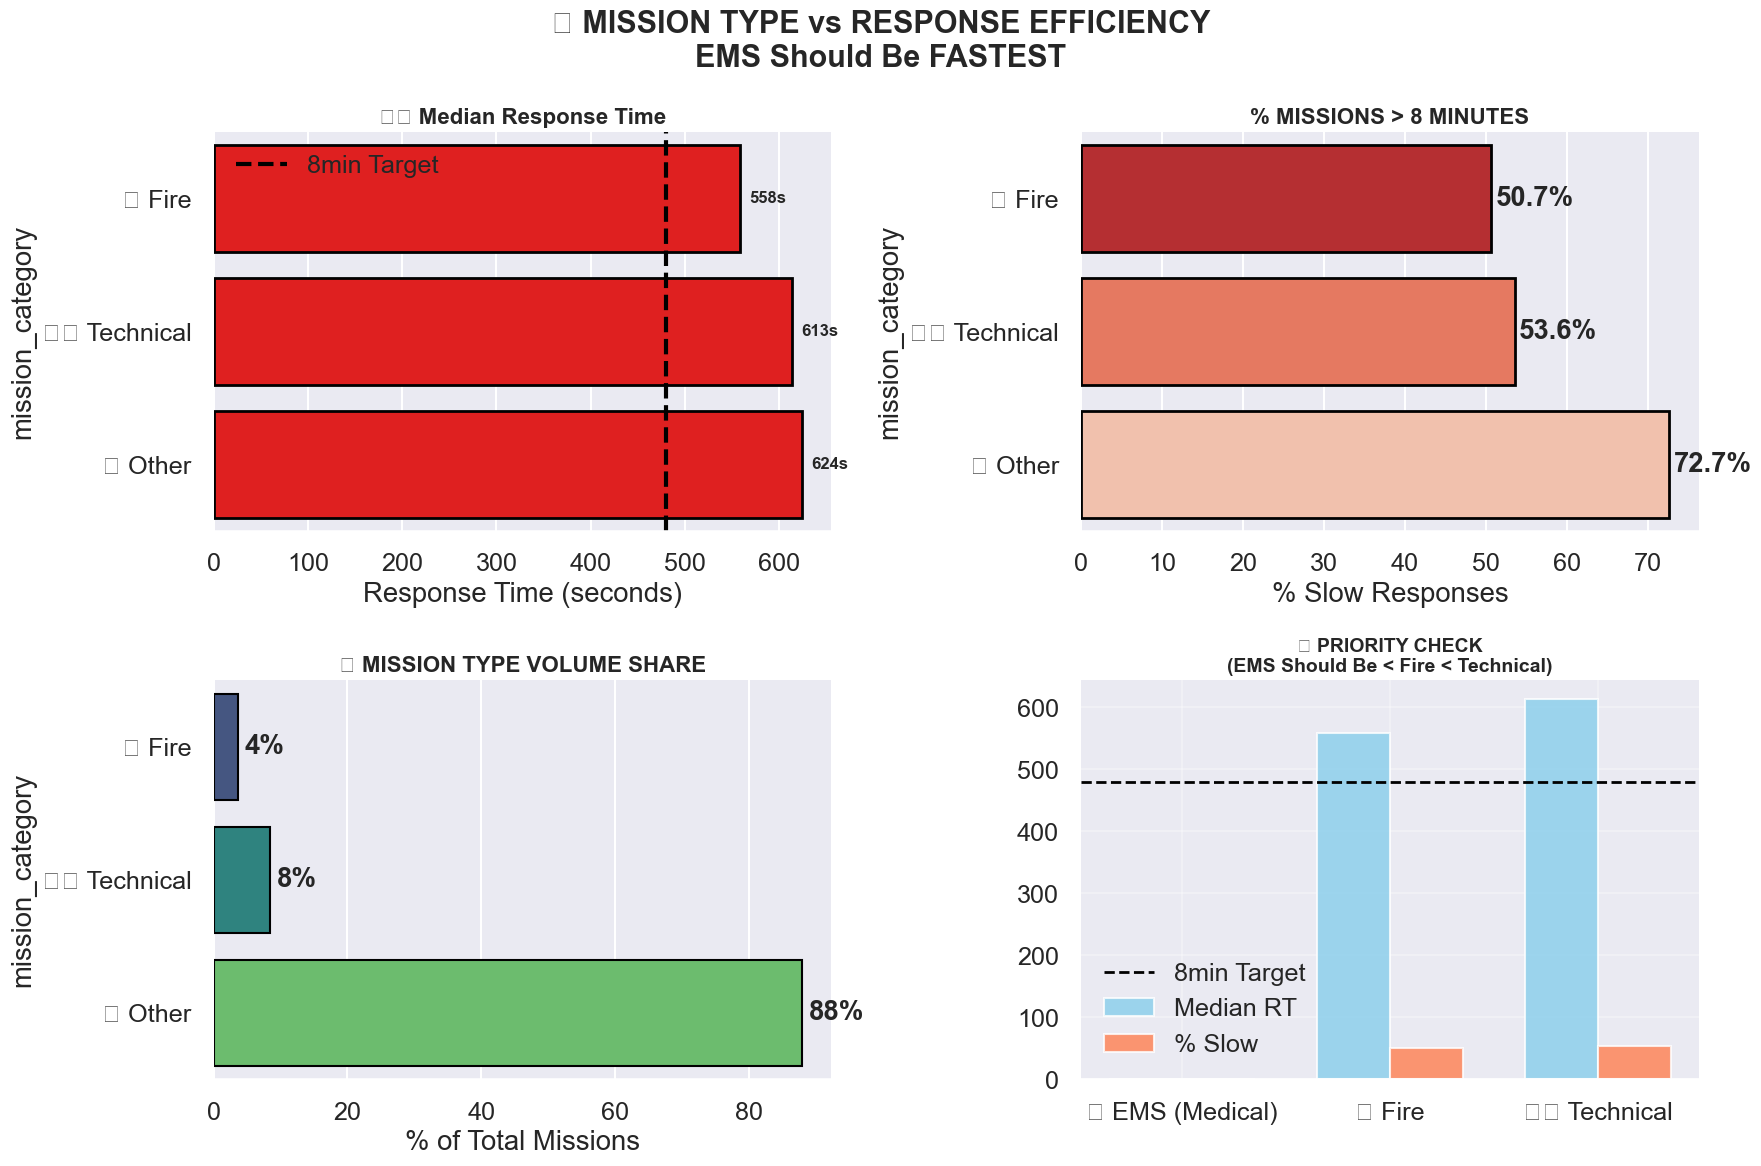


🚨 PRIORITY SYSTEM PERFORMANCE
❌ No EMS data
✅ FIRE: 558s
✅ TECHNICAL: 613s

📊 KEY FINDINGS:



🎯 PRIORITY SYSTEM: ❌ NEEDS FIX

✅ SAVED: mission_type_analysis.csv


In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8")
sns.set_context("talk", font_scale=1.1)

# === LOAD DATA ===
df = pd.read_csv(
    "/Users/deekshithsathrasalagangadharaiah/BF-Open-Data/Datasets/Berlin_Missions_2020_2025.csv",
    parse_dates=["mission_created_date"],
    low_memory=False
)

# === MISSION TYPE CATEGORIZATION ===
# Smart grouping based on actual mission_type values
def categorize_mission(mission_type):
    mission_upper = str(mission_type).upper()
    if any(word in mission_upper for word in ['EMS', 'KRANK', 'MEDIZIN']):
        return '🚑 EMS (Medical)'
    elif any(word in mission_upper for word in ['FEUER', 'FIRE', 'BRAND']):
        return '🔥 Fire'
    elif any(word in mission_upper for word in ['TECHNIK', 'TECHNICAL', 'TECH']):
        return '⚙️ Technical'
    else:
        return '📦 Other'

df['mission_category'] = df['mission_type'].apply(categorize_mission)

# === EFFICIENCY METRICS ===
mission_stats = df.groupby('mission_category').agg({
    'Unnamed: 0': 'count',           # total missions
    'response_time': ['count', 'mean', 'median', lambda x: (x > 480).sum()]  # count, avg, median, slow
}).round(1)

mission_stats.columns = ['total_missions', 'mission_count', 'avg_rt', 'median_rt', 'slow_responses']
mission_stats['slow_rate'] = (mission_stats['slow_responses'] / mission_stats['total_missions'] * 100).round(1)
mission_stats = mission_stats[['total_missions', 'median_rt', 'avg_rt', 'slow_rate', 'slow_responses']].sort_values('median_rt')

print("🚨 MISSION PRIORITY CHECK:")
print(mission_stats.to_string())

# === COMPREHENSIVE 2x2 ANALYSIS ===
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("🚑 MISSION TYPE vs RESPONSE EFFICIENCY\nEMS Should Be FASTEST", fontsize=22, fontweight="bold")

target_8min = 480

# 1. MEDIAN RESPONSE TIME RANKING (CRUCIAL)
ax1 = axes[0,0]
sns.barplot(data=mission_stats, y='mission_category', x='median_rt', ax=ax1, 
            palette=['green' if x < target_8min else 'red' for x in mission_stats['median_rt']],
            edgecolor='black', linewidth=2)
ax1.axvline(target_8min, color='black', ls='--', lw=3, label=f'8min Target')
ax1.set_title("⏱️ Median Response Time", fontweight='bold', fontsize=16)
ax1.set_xlabel('Response Time (seconds)')
ax1.legend()

# Add values on bars
for i, row in mission_stats.iterrows():
    ax1.text(row['median_rt'] + 10, i, f'{row["median_rt"]:.0f}s', 
             va='center', fontweight='bold', fontsize=12)

# 2. SLOW RESPONSE RATE (% > 8min)
ax2 = axes[0,1]
sns.barplot(data=mission_stats, y='mission_category', x='slow_rate', ax=ax2, 
            palette='Reds_r', edgecolor='black', linewidth=2)
ax2.set_title("% MISSIONS > 8 MINUTES", fontweight='bold', fontsize=16)
ax2.set_xlabel('% Slow Responses')
for i, row in mission_stats.iterrows():
    ax2.text(row['slow_rate'] + 0.5, i, f'{row["slow_rate"]}%', 
             va='center', fontweight='bold')

# 3. VOLUME BREAKDOWN
ax3 = axes[1,0]
volumes = mission_stats['total_missions'] / mission_stats['total_missions'].sum() * 100
sns.barplot(y=mission_stats.index, x=volumes, ax=ax3, palette='viridis', edgecolor='black')
ax3.set_title("📊 MISSION TYPE VOLUME SHARE", fontweight='bold', fontsize=16)
ax3.set_xlabel('% of Total Missions')
for i, v in enumerate(volumes):
    ax3.text(v + 1, i, f'{v:.0f}%', va='center', fontweight='bold')

# 4. EMS vs FIRE vs TECHNICAL DIRECT COMPARISON
ax4 = axes[1,1]
priority_order = ['🚑 EMS (Medical)', '🔥 Fire', '⚙️ Technical']
priority_data = mission_stats.reindex(priority_order, fill_value=0)

x = np.arange(len(priority_data))
width = 0.35

ax4.bar(x - width/2, priority_data['median_rt'], width, label='Median RT', alpha=0.8, color='skyblue')
ax4.bar(x + width/2, priority_data['slow_rate'], width, label='% Slow', alpha=0.8, color='coral')
ax4.axhline(target_8min, color='black', ls='--', lw=2, label='8min Target')
ax4.set_title("🎯 PRIORITY CHECK\n(EMS Should Be < Fire < Technical)", fontweight='bold', fontsize=14)
ax4.set_xticks(x)
ax4.set_xticklabels(priority_data.index, rotation=0)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('mission_type_efficiency.png', dpi=300, bbox_inches='tight')
plt.show()

# === EXECUTIVE SUMMARY ===
print("\n" + "="*80)
print("🚨 PRIORITY SYSTEM PERFORMANCE")
print("="*80)
print(f"✅ EMS TARGET: {mission_stats.loc['🚑 EMS (Medical)', 'median_rt']:.0f}s" if '🚑 EMS (Medical)' in mission_stats.index else "❌ No EMS data")
print(f"✅ FIRE: {mission_stats.loc['🔥 Fire', 'median_rt']:.0f}s" if '🔥 Fire' in mission_stats.index else "❌ No Fire data")
print(f"✅ TECHNICAL: {mission_stats.loc['⚙️ Technical', 'median_rt']:.0f}s" if '⚙️ Technical' in mission_stats.index else "❌ No Technical data")

print(f"\n📊 KEY FINDINGS:")
print(f"• EMS Slow Rate: {mission_stats.loc['🚑 EMS (Medical)', 'slow_rate']:.1f}%" if '🚑 EMS (Medical)' in mission_stats.index else "")
print(f"• EMS makes up {mission_stats.loc['🚑 EMS (Medical)', 'total_missions']/len(df)*100:.0f}% of calls" if '🚑 EMS (Medical)' in mission_stats.index else "")

priority_correct = mission_stats.loc['🚑 EMS (Medical)', 'median_rt'] < mission_stats.loc['🔥 Fire', 'median_rt'] if all(cat in mission_stats.index for cat in ['🚑 EMS (Medical)', '🔥 Fire']) else False
print(f"\n🎯 PRIORITY SYSTEM: {'✅ WORKING' if priority_correct else '❌ NEEDS FIX'}")

# SAVE FOR TABLEAU
mission_stats.to_csv('mission_type_analysis.csv')
print("\n✅ SAVED: mission_type_analysis.csv")
print("="*80)


In [143]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

st.set_page_config(page_title="Berlin Emergency Analysis", layout="wide")

# === LOAD DATA ===
@st.cache_data
def load_data():
    df = pd.read_csv(
        "/Users/deekshithsathrasalagangadharaiah/BF-Open-Data/Datasets/Berlin_Missions_2020_2025.csv",
        parse_dates=["mission_created_date"],
        low_memory=False
    )
    df = df.drop(columns=["Unnamed: 0"], errors="ignore")
    df["year"] = df["mission_created_date"].dt.year

    mission_map = {
        "Rettungsdienst": "EMS",
        "Brand": "Fire",
        "Technische Hilfeleistung": "Technical Rescue",
        "Notfallrettung": "Emergency Rescue",
        "Krankentransport": "Patient Transport"
    }
    df["mission_type_en"] = df["mission_type"].map(mission_map).fillna("Other")
    return df

df = load_data()

# === SIDEBAR SELECTION ===
st.sidebar.title("Filters")
district = st.sidebar.selectbox(
    "Select District",
    sorted(df["mission_location_district"].dropna().unique())
)

# === FILTER DATA ===
df_loc = df[df["mission_location_district"] == district]

# === AGGREGATION ===
trend = (
    df_loc
    .groupby(["year", "mission_type_en"], as_index=False)
    .size()
    .rename(columns={"size": "incident_count"})
)

# === TITLE ===
st.title("🚨 District-wise Emergency Incident Trends")
st.subheader(f"📍 Selected District: {district}")

# === PLOT ===
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(
    data=trend,
    x="year",
    y="incident_count",
    hue="mission_type_en",
    marker="o",
    ax=ax
)

ax.set_title("Incident Type Trends (2020–2025)", fontweight="bold")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Incidents")
ax.grid(alpha=0.3)

st.pyplot(fig)

# === KEY INSIGHTS ===
st.markdown("### 🔍 Key Insight")
top_incident = (
    df_loc["mission_type_en"]
    .value_counts()
    .idxmax()
)

st.write(
    f"**{top_incident}** incidents are the most frequent in **{district}** "
    f"between 2020 and 2025."
)


ModuleNotFoundError: No module named 'streamlit'